<a href="https://colab.research.google.com/github/kabuck/co-op-code/blob/main/PyCaret_Regressions_(ALL_Hardness).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret --user

In [ ]:
#@title
import pycaret
from pycaret.datasets import *

In [ ]:
#@title
#Import Libraries
import pandas as pd

#Import/Download Data
from google.colab import files
uploaded = files.upload()
import io

Saving ds1.csv to ds1.csv


In [ ]:
#@title
df = pd.read_csv(io.BytesIO(uploaded['ds1.csv']))

In [ ]:
#@title
print(df.shape)
df.head(5)

#Format the data

headers = ["Alloy No.", "Al", "Co", "Cr", "Cu", "Fe", "Ni", "Hardness"]
df.columns = headers #Changes the headers
df.drop([0,0], inplace=True) #removes the extra headers
print(df.head(5))
df = df[["Al", "Co", 'Cr', 'Cu', "Fe", "Ni", "Hardness"]].astype("float")
df.info()
print(df.min)
df.head(5)

(156, 8)
   Alloy No.    Al    Co    Cr    Cu    Fe    Ni  Hardness
1        1.0  18.2   9.1  18.2  18.2  18.2  18.2     473.0
2        2.0  18.2  18.2   9.1  18.2  18.2  18.2     367.0
3        3.0  18.2  18.2  18.2  18.2   9.1  18.2     418.0
4        4.0  18.2  18.2  18.2  18.2  18.2   9.1     423.0
5        5.0   5.3  21.1  21.1     0  26.3  26.3     168.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 1 to 155
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Al        155 non-null    float64
 1   Co        155 non-null    float64
 2   Cr        155 non-null    float64
 3   Cu        155 non-null    float64
 4   Fe        155 non-null    float64
 5   Ni        155 non-null    float64
 6   Hardness  155 non-null    float64
dtypes: float64(7)
memory usage: 9.7 KB
<bound method DataFrame.min of        Al    Co    Cr    Cu    Fe    Ni  Hardness
1    18.2   9.1  18.2  18.2  18.2  18.2     473.0
2    18.2  

Al    Co    Cr    Cu    Fe    Ni  Hardness
1  18.2   9.1  18.2  18.2  18.2  18.2     473.0
2  18.2  18.2   9.1  18.2  18.2  18.2     367.0
3  18.2  18.2  18.2  18.2   9.1  18.2     418.0
4  18.2  18.2  18.2  18.2  18.2   9.1     423.0
5   5.3  21.1  21.1   0.0  26.3  26.3     168.0

In [ ]:
#@title
from pycaret.regression import *
regr1 = setup(data = df, target = "Hardness", train_size = 0.7)

Description             Value
0                               session_id              5952
1                                   Target          Hardness
2                            Original Data          (155, 7)
3                           Missing Values             False
4                         Numeric Features                 6
5                     Categorical Features                 0
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set          (108, 6)
10                    Transformed Test Set           (47, 6)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              3f9b
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42                              Clustering             False
43                    Clustering Iteration              None
44                     Polynomial Features             False
45                       Polynomial Degree              None
46                    Trignometry Features             False
47                    Polynomial Threshold              None
48                          Group Features             False
49                       Feature Selection             False
50                Feature Selection Method           classic
51            Features Selection Threshold              None
52                     Feature Interaction             False
53                           Feature Ratio             False
54                   Interaction Threshold              None
55                        Transform Target             False
56                 Transform Target Method           box-cox

In [ ]:
#@title
#Return best model
best = compare_models(fold = 10, sort = "MSE")

Model      MAE         MSE      RMSE  \
et                  Extra Trees Regressor  42.2518   3417.5538   56.0496   
gbr           Gradient Boosting Regressor  51.6286   4779.3182   66.6878   
rf                Random Forest Regressor  50.1892   5136.1633   67.9330   
ada                    AdaBoost Regressor  52.1218   5180.3325   66.8045   
knn                 K Neighbors Regressor  52.3098   5477.5242   69.7780   
lightgbm  Light Gradient Boosting Machine  57.0113   6044.3949   73.8209   
br                         Bayesian Ridge  66.8362   7114.0860   81.8038   
en                            Elastic Net  66.8127   7128.7121   81.8618   
ridge                    Ridge Regression  66.7566   7133.5695   81.8475   
lasso                    Lasso Regression  66.8179   7138.7822   81.8971   
lr                      Linear Regression  66.6620   7159.2422   81.8816   
lar                Least Angle Regression  66.6620   7159.5548   81.8829   
llar         Lasso Least Angle Regression  69.2326   7330.2805   83.2079   
huber                     Huber Regressor  68.6696   7521.8318   83.8707   
dt                Decision Tree Regressor  60.0882   8668.9045   87.3361   
omp           Orthogonal Matching Pursuit  75.2829   9407.2041   92.8079   
par          Passive Aggressive Regressor  92.7696  12971.3226  110.8350   

              R2   RMSLE    MAPE  TT (Sec)  
et        0.8896  0.1512  0.1208     0.360  
gbr       0.8461  0.1860  0.1528     0.044  
rf        0.8291  0.1943  0.1466     0.410  
ada       0.8268  0.1939  0.1563     0.076  
knn       0.8280  0.1933  0.1692     0.060  
lightgbm  0.8111  0.2194  0.1730     0.023  
br        0.7729  0.2423  0.2101     0.013  
en        0.7724  0.2421  0.2093     0.015  
ridge     0.7722  0.2426  0.2089     0.012  
lasso     0.7721  0.2422  0.2089     0.013  
lr        0.7703  0.2467  0.2096     0.275  
lar       0.7702  0.2468  0.2096     0.013  
llar      0.7654  0.2499  0.2258     0.012  
huber     0.7598  0.2530  0.2109     0.019  
dt        0.7069  0.2349  0.1631     0.012  
omp       0.6955  0.2617  0.2346     0.011  
par       0.5637  0.3934  0.2816     0.013

**KNN Regressor**

In [ ]:
#@title
#KNN Regressor
knn = create_model("knn")

MAE         MSE      RMSE      R2   RMSLE    MAPE
0     33.8909   2220.6174   47.1234  0.9352  0.0912  0.0719
1     95.3091  15547.5215  124.6897  0.6354  0.5103  0.5308
2     36.3636   2318.1819   48.1475  0.9085  0.1288  0.0953
3     31.6545   2304.8035   48.0084  0.9235  0.1014  0.0737
4     74.6000   7163.0073   84.6346  0.6938  0.1695  0.1499
5     38.2909   3093.4321   55.6186  0.8876  0.0970  0.0714
6     65.4000   7170.6802   84.6799  0.7921  0.1990  0.1641
7     33.9091   2263.0154   47.5712  0.9211  0.1126  0.0874
8     45.1600   4353.3906   65.9802  0.7980  0.1917  0.1382
9     68.5200   8340.5918   91.3268  0.7847  0.3312  0.3088
Mean  52.3098   5477.5242   69.7780  0.8280  0.1933  0.1692
SD    20.9436   4040.3628   24.6688  0.0992  0.1261  0.1385

In [ ]:
#@title
#Train KNN Regressor using 5 fold CV
knn = create_model("knn", fold = 5)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0     73.2000  11110.6982  105.4073  0.7314  0.4025  0.3507
1     48.3364   3833.9651   61.9190  0.8617  0.1646  0.1272
2     55.8818   5338.0640   73.0621  0.7947  0.1446  0.1094
3     50.9048   4801.8271   69.2952  0.8665  0.1650  0.1321
4     62.2381   7454.2344   86.3379  0.7607  0.2772  0.2328
Mean  58.1122   6507.7578   79.2043  0.8030  0.2308  0.1904
SD     8.9124   2588.8387   15.3113  0.0538  0.0978  0.0910

In [ ]:
#@title
#Tune KNN
tuned_knn = tune_model(knn, n_iter = 50, fold = 10)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0     41.5863   2534.0724   50.3396  0.9260  0.1036  0.0918
1     81.4097  10466.7428  102.3071  0.7546  0.4305  0.4170
2     24.7468   1013.2951   31.8323  0.9600  0.0868  0.0633
3     27.1640   2070.2152   45.4996  0.9313  0.0908  0.0627
4     52.6294   4442.8020   66.6543  0.8101  0.1230  0.1002
5     34.9690   2646.4934   51.4441  0.9039  0.0919  0.0689
6     62.7630   7614.9109   87.2635  0.7792  0.2074  0.1542
7     26.3549   2102.2695   45.8505  0.9267  0.1019  0.0620
8     28.6631   1385.4779   37.2220  0.9357  0.1082  0.0827
9     52.2834   7206.1561   84.8891  0.8140  0.3156  0.2571
Mean  43.2570   4148.2435   60.3302  0.8741  0.1660  0.1360
SD    17.8247   3036.5210   22.5502  0.0720  0.1117  0.1099

In [ ]:
#@title
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(knn, plot='residuals_interactive')

In [ ]:
from google.colab import files
uploaded = files.upload()
import io

Saving exp_data.csv to exp_data.csv


In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['exp_data.csv']))

In [ ]:
print(df2.head())

   Alloy No. Elemental content, at%  ... Predicted Hardness, HV   Unnamed: 8
0        NaN                     al  ...                   mean           sd
1        1.0                     43  ...            863.3019249  8.442993743
2        2.0                     43  ...            862.9470279  8.591865442
3        3.0                     43  ...            862.9196736  8.912158167
4        4.0                     43  ...            862.4115509  8.560812631

[5 rows x 9 columns]


In [ ]:
print(df2.shape)
df2.head(5)

#Format the data

headers = ["Alloy No.", "Al", "Co", "Cr", "Cu", "Fe", "Ni", "PredictedHVmean", "PredictedHVsd"]
df2.columns = headers #Changes the headers
df2.drop([0,0], inplace=True) #removes the extra headers
print(df2.head(5))

(61144, 9)
   Alloy No.  Al  Co  Cr Cu Fe Ni PredictedHVmean PredictedHVsd
1        1.0  43  22  23  0  7  5     863.3019249   8.442993743
2        2.0  43  22  22  0  8  5     862.9470279   8.591865442
3        3.0  43  21  23  0  8  5     862.9196736   8.912158167
4        4.0  43  23  22  0  7  5     862.4115509   8.560812631
5        5.0  43  21  24  0  7  5     861.7436536   9.479824856


In [ ]:
df2 = df2[["Al", "Co", 'Cr', 'Cu', "Fe", "Ni", "PredictedHVmean", "PredictedHVsd"]].astype("float")
df2.info()
print(df2.min)
df2.head(5)
df2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61143 entries, 1 to 61143
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Al               61143 non-null  float64
 1   Co               61143 non-null  float64
 2   Cr               61143 non-null  float64
 3   Cu               61143 non-null  float64
 4   Fe               61143 non-null  float64
 5   Ni               61143 non-null  float64
 6   PredictedHVmean  61143 non-null  float64
 7   PredictedHVsd    61143 non-null  float64
dtypes: float64(8)
memory usage: 4.2 MB
<bound method DataFrame.min of          Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       

(61143, 8)

In [ ]:
final_knn = finalize_model(knn)

Model 1 Predictions (knn w 155 original samples)

In [ ]:
pd.set_option('display.max_columns', None)
predictions = predict_model(final_knn, data = df2)
print(predictions)
x = predictions.sort_values(by = ["Label"], ascending = False).index

         Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

            Label  
1      726.200012  
2      726.200012  
3      738.7999

In [ ]:
errorsq1 = np.square(predictions["PredictedHVmean"] - predictions["Label"])
errorsq1
mse1 = (np.sum(errorsq1))/(predictions["Label"].count())
mse1

errorsq2 = np.square((predictions["PredictedHVmean"] - predictions["PredictedHVsd"]) - predictions["Label"])
errorsq2
mse2 = (np.sum(errorsq2))/(predictions["Label"].count())
mse2

errorsq3 = np.square((predictions["PredictedHVmean"] + predictions["PredictedHVsd"]) - predictions["Label"])
errorsq3
mse3 = (np.sum(errorsq3))/(predictions["Label"].count())
mse3

print("MSE: ", mse1, "\nMSE (lower bound): ", mse2, "\nMSE (upper bound) :", mse3)

MSE:  4818.674600533844 
MSE (lower bound):  2249.7788196769807 
MSE (upper bound) : 8780.745136290354


In [ ]:
table = predictions.drop(columns = predictions[["PredictedHVsd"]])
headers = ["Al (at%)", "Co (at%)", "Cr (at%)", "Cu (at%)", "Fe (at%)", "Ni (at%)", "Predicted HV (article)", "Predicted HV (KNN)"]
table.columns = headers
table

Al (at%)  Co (at%)  Cr (at%)  Cu (at%)  Fe (at%)  Ni (at%)  \
1          43.0      22.0      23.0       0.0       7.0       5.0   
2          43.0      22.0      22.0       0.0       8.0       5.0   
3          43.0      21.0      23.0       0.0       8.0       5.0   
4          43.0      23.0      22.0       0.0       7.0       5.0   
5          43.0      21.0      24.0       0.0       7.0       5.0   
...         ...       ...       ...       ...       ...       ...   
61139      46.0      10.0      12.0      12.0      14.0       6.0   
61140      46.0      17.0       9.0      11.0      10.0       7.0   
61141      47.0      16.0      11.0       9.0       6.0      11.0   
61142      41.0      13.0      12.0      10.0      15.0       9.0   
61143      43.0       9.0      31.0       0.0       6.0      11.0   

       Predicted HV (article)  Predicted HV (KNN)  
1                  863.301925          726.200012  
2                  862.947028          726.200012  
3                  862.919674          738.799988  
4                  862.411551          726.200012  
5                  861.743654          738.799988  
...                       ...                 ...  
61139              750.003800          710.799988  
61140              750.003598          725.200012  
61141              750.002858          689.799988  
61142              750.001713          710.799988  
61143              750.001031          722.599976  

[61143 rows x 8 columns]

<function matplotlib.pyplot.show>

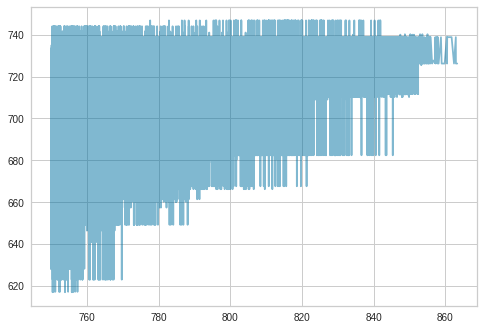

In [ ]:
import matplotlib.pyplot as plt

plt.plot(table["Predicted HV (article)"], table["Predicted HV (model)"], alpha = 0.5)
plt.show

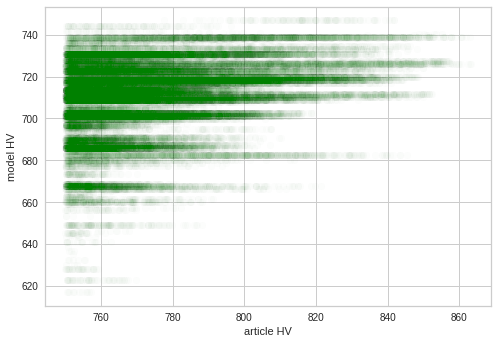

In [ ]:
fig1 = plt.scatter(table["Predicted HV (article)"], table["Predicted HV (model)"], color = "green", alpha = 0.01)

plt.xlabel("article HV")
plt.ylabel("model HV")
plt.show()

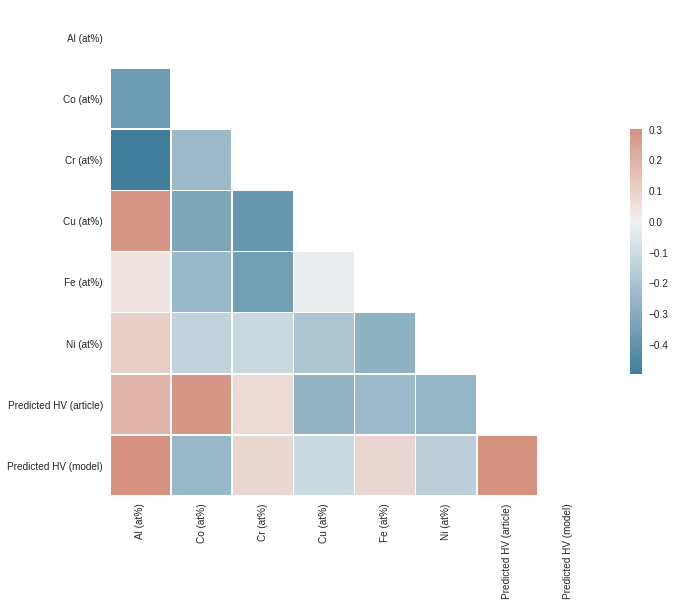

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr = table.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

         Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

            Label  
1      726.200012  
2      726.200012  
3      738.7999

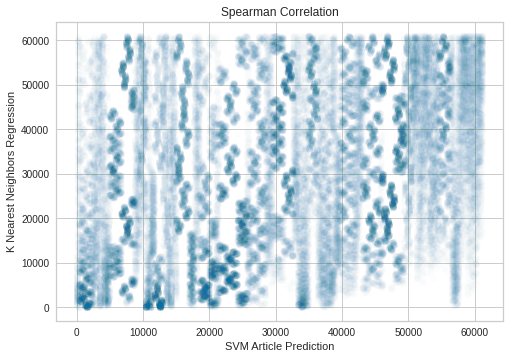

In [ ]:
predictions = predict_model(final_knn, data = df2)
print(predictions)
x = predictions.sort_values(by = ["Label"], ascending = False).index
import matplotlib.pyplot as plt
plt.plot(x, "bo", alpha = 0.01)
plt.ylabel("K Nearest Neighbors Regression")
plt.xlabel("SVM Article Prediction")
plt.title("Spearman Correlation")
plt.show()

Thinking

In [ ]:
from sklearn import metrics

y_pred = predictions["Label"]
y_test = predictions["PredictedHVmean"]

predictions.count #61143
n = 61143


MSE = np.square(np.subtract(y_test, y_pred)).mean()
MSE

4818.674600533898

In [ ]:
df2

Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825
...     ...   ...   ...   ...   ...   ...              ...            ...
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902

[61143 rows x 8 columns]

In [ ]:
import random
randomlist = []
for i in range(0,61144):
  n = random.randint(1,10)
  randomlist.append(n)
  
randomgroup = pd.DataFrame(randomlist)
randomgroup.columns = ["group"]


'''
df2.loc[(df2["Al"] == 42), "group"] = 1
df2.loc[(df2["Al"] == 41), "group"] = 2
df2.loc[(df2["Al"] == 43), "group"] = 3
df2.loc[(df2["Al"] == 45), "group"] = 4
df2.loc[(df2["Al"] == 44), "group"] = 5
df2.loc[(df2["Al"] == 40), "group"] = 6
df2.loc[(df2["Al"] == 46), "group"] = 7
df2.loc[(df2["Al"] == 47), "group"] = 8
df2.loc[(df2["Al"] == 39), "group"] = 9
df2.loc[((df2["Al"] < 39)), "group"] = 10


df2["group"].value_counts()
#df["Al"].value_counts()
'''

randomgroup.shape

df2["group"] = randomgroup
df2

Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

       group  
1          4  
2          5  
3         10  
4          5  
5          5  
...      ...  
61139      2  
61140      6  
61141      6  
61142      1  
61143      5  

[61143 rows x 9 columns]

In [ ]:
grouped = df2.groupby(df2["group"])
df_new1 = grouped.get_group(1)
df_new1

grouped = df2.groupby(df2["group"])
df_new2 = grouped.get_group(2)
df_new2

grouped = df2.groupby(df2["group"])
df_new3 = grouped.get_group(3)
df_new3

grouped = df2.groupby(df2["group"])
df_new4 = grouped.get_group(4)
df_new4

grouped = df2.groupby(df2["group"])
df_new5 = grouped.get_group(5)
df_new5

grouped = df2.groupby(df2["group"])
df_new6 = grouped.get_group(6)
df_new6

grouped = df2.groupby(df2["group"])
df_new7 = grouped.get_group(7)
df_new7

grouped = df2.groupby(df2["group"])
df_new8 = grouped.get_group(8)
df_new8

grouped = df2.groupby(df2["group"])
df_new9 = grouped.get_group(9)
df_new9

grouped = df2.groupby(df2["group"])
df_new10 = grouped.get_group(10)
df_new10


Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
13     43.0  24.0  21.0   0.0   7.0   5.0       858.964544      10.061949   
23     43.0  19.0  24.0   0.0   9.0   5.0       857.202067      11.376551   
32     43.0  19.0  25.0   0.0   8.0   5.0       855.907987      11.795499   
42     43.0  21.0  22.0   0.0   7.0   7.0       855.383811      10.395297   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61109  45.0  12.0  12.0  13.0  11.0   7.0       750.021488      37.170499   
61116  40.0   9.0  29.0   6.0   6.0  10.0       750.016325      35.961726   
61130  46.0  14.0  11.0   6.0  10.0  13.0       750.007842      30.481153   
61135  44.0  14.0  10.0   7.0  18.0   7.0       750.006144      30.665979   
61137  44.0  18.0   9.0   9.0  11.0   9.0       750.004903      29.117669   

       group  
3         10  
13        10  
23        10  
32        10  
42        10  
...      ...  
61109     10  
61116     10  
61130     10  
61135     10  
61137     10  

[6276 rows x 9 columns]

In [ ]:
pd.set_option('display.max_columns', None) #7


Checking MSE to determine which group to use to update model; did it differently before, so #min MSE will be different; it was just used to determine order of folds (so doesn't really matter)

In [ ]:
mse = []

predictions1 = predict_model(final_knn, data = df_new1)
MSE = np.square(np.subtract(predictions1["PredictedHVmean"],predictions1["Label"])).mean()
MSE = mse.append(MSE)

predictions2 = predict_model(final_knn, data = df_new2)
MSE = np.square(np.subtract(predictions2["PredictedHVmean"],predictions2["Label"])).mean()
MSE = mse.append(MSE) 

predictions3 = predict_model(final_knn, data = df_new3)
MSE = np.square(np.subtract(predictions3["PredictedHVmean"],predictions3["Label"])).mean()
MSE = mse.append(MSE) 

predictions4 = predict_model(final_knn, data = df_new4)
MSE = np.square(np.subtract(predictions4["PredictedHVmean"],predictions4["Label"])).mean()
MSE = mse.append(MSE) 

predictions5 = predict_model(final_knn, data = df_new5)
MSE = np.square(np.subtract(predictions5["PredictedHVmean"],predictions5["Label"])).mean()
MSE = mse.append(MSE)

predictions6 = predict_model(final_knn, data = df_new6)
MSE = np.square(np.subtract(predictions6["PredictedHVmean"],predictions6["Label"])).mean()
MSE = mse.append(MSE) 

predictions7 = predict_model(final_knn, data = df_new7)
MSE = np.square(np.subtract(predictions7["PredictedHVmean"],predictions7["Label"])).mean()
MSE = mse.append(MSE) 

predictions8 = predict_model(final_knn, data = df_new8)
MSE = np.square(np.subtract(predictions8["PredictedHVmean"],predictions8["Label"])).mean()
MSE = mse.append(MSE) 

predictions9 = predict_model(final_knn, data = df_new9)
MSE = np.square(np.subtract(predictions9["PredictedHVmean"],predictions9["Label"])).mean()
MSE = mse.append(MSE) 

predictions10 = predict_model(final_knn, data = df_new10)
MSE = np.square(np.subtract(predictions10["PredictedHVmean"],predictions10["Label"])).mean()
MSE = mse.append(MSE) 

mse

#min MSE = 4584 -> group 5

[4857.965685950213,
 4828.863735445374,
 4823.68034459583,
 4854.95163149671,
 4792.196530015041,
 4829.375114620132,
 4809.503840234143,
 4762.831792633905,
 4855.135636005274,
 4773.106579625208]

In [ ]:
#Use predicted HV as actual HV to simulate what they did in the article

predictions5
predictions5.columns = ["Al", "Co", "Cr", "Cu", "Fe", "Ni", "Hardness", "PredictedHVsd", "group", "Label"]

new5 = predictions5.drop(columns = predictions5[["Label", "PredictedHVsd", "group"]])
new5

Al    Co    Cr   Cu    Fe    Ni    Hardness
2      43.0  22.0  22.0  0.0   8.0   5.0  862.947028
4      43.0  23.0  22.0  0.0   7.0   5.0  862.411551
5      43.0  21.0  24.0  0.0   7.0   5.0  861.743654
6      43.0  22.0  24.0  0.0   6.0   5.0  860.774578
10     43.0  22.0  21.0  0.0   9.0   5.0  859.802092
...     ...   ...   ...  ...   ...   ...         ...
61080  42.0   6.0  24.0  6.0  13.0   9.0  750.039455
61085  45.0  11.0  12.0  6.0  14.0  12.0  750.036892
61092  45.0  19.0   8.0  8.0  13.0   7.0  750.031071
61138  47.0  14.0  10.0  5.0  17.0   7.0  750.004181
61143  43.0   9.0  31.0  0.0   6.0  11.0  750.001031

[6114 rows x 7 columns]

In [ ]:
df_combined_1 = pd.concat([df, new5])
df_combined_1

Al    Co    Cr    Cu    Fe    Ni    Hardness
1      18.2   9.1  18.2  18.2  18.2  18.2  473.000000
2      18.2  18.2   9.1  18.2  18.2  18.2  367.000000
3      18.2  18.2  18.2  18.2   9.1  18.2  418.000000
4      18.2  18.2  18.2  18.2  18.2   9.1  423.000000
5       5.3  21.1  21.1   0.0  26.3  26.3  168.000000
...     ...   ...   ...   ...   ...   ...         ...
61080  42.0   6.0  24.0   6.0  13.0   9.0  750.039455
61085  45.0  11.0  12.0   6.0  14.0  12.0  750.036892
61092  45.0  19.0   8.0   8.0  13.0   7.0  750.031071
61138  47.0  14.0  10.0   5.0  17.0   7.0  750.004181
61143  43.0   9.0  31.0   0.0   6.0  11.0  750.001031

[6269 rows x 7 columns]

KNN model 2 getting made:

the predicted HV from the article were assumed to be actual values and added to the original dataframe; this data will be used to test the second model.

In [ ]:
regr2 = setup(data = df_combined_1, target = "Hardness", train_size = 0.7)
knn2 = create_model("knn", fold=10)
evaluate_model(knn2)

MAE       MSE     RMSE      R2   RMSLE    MAPE
0     5.4587   68.1181   8.2534  0.9810  0.0191  0.0081
1     6.1074  202.9043  14.2444  0.9605  0.0492  0.0121
2     6.6262  191.9271  13.8538  0.9656  0.0386  0.0117
3     5.9785  105.7228  10.2822  0.9761  0.0395  0.0106
4     6.0004  122.1361  11.0515  0.9721  0.0269  0.0094
5     7.1685  269.5898  16.4192  0.9486  0.0488  0.0134
6     5.9709  154.4415  12.4274  0.9729  0.0309  0.0097
7     6.1072   97.9679   9.8979  0.9692  0.0180  0.0088
8     6.9306  288.7765  16.9934  0.9440  0.0589  0.0144
9     6.3616  207.8815  14.4181  0.9597  0.0412  0.0117
Mean  6.2710  170.9465  12.7841  0.9650  0.0371  0.0110
SD    0.4834   70.1774   2.7409  0.0113  0.0127  0.0019

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pd.set_option('display.max_columns', None)
final_knn2 = finalize_model(knn2)
predictions = predict_model(final_knn2, data = df2)
print(predictions)

         Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

       group       Label  
1          4  861.500854  
2          5  858.955

these predictions more closely match those predicted in the article

In [ ]:
mse2 = []

predictions1_2 = predict_model(final_knn2, data = df_new1)
MSE = np.square(np.subtract(predictions1_2["PredictedHVmean"],predictions1_2["Label"])).mean()
MSE = mse2.append(MSE)

predictions2_2 = predict_model(final_knn2, data = df_new2)
MSE = np.square(np.subtract(predictions2_2["PredictedHVmean"],predictions2_2["Label"])).mean()
MSE = mse2.append(MSE) 

predictions3_2 = predict_model(final_knn2, data = df_new3)
MSE = np.square(np.subtract(predictions3_2["PredictedHVmean"],predictions3_2["Label"])).mean()
MSE = mse2.append(MSE) 

predictions4_2 = predict_model(final_knn2, data = df_new4)
MSE = np.square(np.subtract(predictions4_2["PredictedHVmean"],predictions4_2["Label"])).mean()
MSE = mse2.append(MSE) 

predictions5_2 = predict_model(final_knn2, data = df_new5)
MSE = np.square(np.subtract(predictions5_2["PredictedHVmean"],predictions5_2["Label"])).mean()
MSE = mse2.append(MSE)

predictions6_2 = predict_model(final_knn2, data = df_new6)
MSE = np.square(np.subtract(predictions6_2["PredictedHVmean"],predictions6_2["Label"])).mean()
MSE = mse2.append(MSE) 

predictions7_2 = predict_model(final_knn2, data = df_new7)
MSE = np.square(np.subtract(predictions7_2["PredictedHVmean"],predictions7_2["Label"])).mean()
MSE = mse2.append(MSE) 

predictions8_2 = predict_model(final_knn2, data = df_new8)
MSE = np.square(np.subtract(predictions8_2["PredictedHVmean"],predictions8_2["Label"])).mean()
MSE = mse2.append(MSE) 

predictions9_2 = predict_model(final_knn2, data = df_new9)
MSE = np.square(np.subtract(predictions9_2["PredictedHVmean"],predictions9_2["Label"])).mean()
MSE = mse2.append(MSE) 

predictions10_2 = predict_model(final_knn2, data = df_new10)
MSE = np.square(np.subtract(predictions10_2["PredictedHVmean"],predictions10_2["Label"])).mean()
MSE = mse2.append(MSE) 

mse2
print("mse: ", mse, "\nmse2: ", mse2)
#min MSE = 4584 -> group 5
#min MSE2 = 1507 -> group 10

mse:  [4857.965685950213, 4828.863735445374, 4823.68034459583, 4854.95163149671, 4792.196530015041, 4829.375114620132, 4809.503840234143, 4762.831792633905, 4855.135636005274, 4773.106579625208] 
mse2:  [35.18759707117153, 33.95897018083559, 34.16072420071933, 32.89062666760448, 21.89986131986527, 33.75786108934565, 33.02680695186447, 33.7740016167113, 33.50055742601035, 33.009479306457365]


Use Predicted HV as actual; update table

In [ ]:
predictions10_2
predictions10_2.columns = ["Al", "Co", "Cr", "Cu", "Fe", "Ni", "Hardness", "PredictedHVsd", "group", "Label"]

new10_2 = predictions10_2.drop(columns = predictions10_2[["Label", "PredictedHVsd", "group"]])
new10_2

Al    Co    Cr    Cu    Fe    Ni    Hardness
3      43.0  21.0  23.0   0.0   8.0   5.0  862.919674
13     43.0  24.0  21.0   0.0   7.0   5.0  858.964544
23     43.0  19.0  24.0   0.0   9.0   5.0  857.202067
32     43.0  19.0  25.0   0.0   8.0   5.0  855.907987
42     43.0  21.0  22.0   0.0   7.0   7.0  855.383811
...     ...   ...   ...   ...   ...   ...         ...
61109  45.0  12.0  12.0  13.0  11.0   7.0  750.021488
61116  40.0   9.0  29.0   6.0   6.0  10.0  750.016325
61130  46.0  14.0  11.0   6.0  10.0  13.0  750.007842
61135  44.0  14.0  10.0   7.0  18.0   7.0  750.006144
61137  44.0  18.0   9.0   9.0  11.0   9.0  750.004903

[6276 rows x 7 columns]

In [ ]:
df_combined_2 = pd.concat([df, new10_2])
df_combined_2

Al    Co    Cr    Cu    Fe    Ni    Hardness
1      18.2   9.1  18.2  18.2  18.2  18.2  473.000000
2      18.2  18.2   9.1  18.2  18.2  18.2  367.000000
3      18.2  18.2  18.2  18.2   9.1  18.2  418.000000
4      18.2  18.2  18.2  18.2  18.2   9.1  423.000000
5       5.3  21.1  21.1   0.0  26.3  26.3  168.000000
...     ...   ...   ...   ...   ...   ...         ...
61109  45.0  12.0  12.0  13.0  11.0   7.0  750.021488
61116  40.0   9.0  29.0   6.0   6.0  10.0  750.016325
61130  46.0  14.0  11.0   6.0  10.0  13.0  750.007842
61135  44.0  14.0  10.0   7.0  18.0   7.0  750.006144
61137  44.0  18.0   9.0   9.0  11.0   9.0  750.004903

[6431 rows x 7 columns]

KNN 3

In [ ]:
regr3 = setup(data = df_combined_2, target = "Hardness", train_size = 0.7)
knn3 = create_model("knn", fold=10)
evaluate_model(knn3)

MAE       MSE     RMSE      R2   RMSLE    MAPE
0     6.1028  121.1877  11.0085  0.9830  0.0226  0.0095
1     6.2933  245.0283  15.6534  0.9332  0.0509  0.0124
2     6.8373  206.7721  14.3796  0.9685  0.0411  0.0125
3     6.0998  159.2695  12.6202  0.9650  0.0449  0.0120
4     6.5402  177.8647  13.3366  0.9037  0.0271  0.0094
5     5.2646   50.3674   7.0970  0.9776  0.0113  0.0072
6     6.8992  303.2951  17.4154  0.9510  0.0579  0.0145
7     5.9275   76.5558   8.7496  0.9727  0.0142  0.0082
8     6.1081  131.9753  11.4881  0.9802  0.0341  0.0108
9     5.4880   79.4055   8.9110  0.9748  0.0241  0.0082
Mean  6.1561  155.1722  12.0659  0.9610  0.0328  0.0105
SD    0.4984   76.0309   3.0960  0.0238  0.0148  0.0022

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pd.set_option('display.max_columns', None)
final_knn3 = finalize_model(knn3)
predictions = predict_model(final_knn3, data = df2)
print(predictions)

         Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

       group       Label  
1          4  851.876160  
2          5  850.953

In [ ]:
mse3 = []

predictions1_3 = predict_model(final_knn3, data = df_new1)
MSE = np.square(np.subtract(predictions1_3["PredictedHVmean"],predictions1_3["Label"])).mean()
MSE = mse3.append(MSE)

predictions2_3 = predict_model(final_knn3, data = df_new2)
MSE = np.square(np.subtract(predictions2_3["PredictedHVmean"],predictions2_3["Label"])).mean()
MSE = mse3.append(MSE) 

predictions3_3 = predict_model(final_knn3, data = df_new3)
MSE = np.square(np.subtract(predictions3_3["PredictedHVmean"],predictions3_3["Label"])).mean()
MSE = mse3.append(MSE) 

predictions4_3 = predict_model(final_knn3, data = df_new4)
MSE = np.square(np.subtract(predictions4_3["PredictedHVmean"],predictions4_3["Label"])).mean()
MSE = mse3.append(MSE) 

predictions5_3 = predict_model(final_knn3, data = df_new5)
MSE = np.square(np.subtract(predictions5_3["PredictedHVmean"],predictions5_3["Label"])).mean()
MSE = mse3.append(MSE)

predictions6_3 = predict_model(final_knn3, data = df_new6)
MSE = np.square(np.subtract(predictions6_3["PredictedHVmean"],predictions6_3["Label"])).mean()
MSE = mse3.append(MSE) 

predictions7_3 = predict_model(final_knn3, data = df_new7)
MSE = np.square(np.subtract(predictions7_3["PredictedHVmean"],predictions7_3["Label"])).mean()
MSE = mse3.append(MSE) 

predictions8_3 = predict_model(final_knn3, data = df_new8)
MSE = np.square(np.subtract(predictions8_3["PredictedHVmean"],predictions8_3["Label"])).mean()
MSE = mse3.append(MSE) 

predictions9_3 = predict_model(final_knn3, data = df_new9)
MSE = np.square(np.subtract(predictions9_3["PredictedHVmean"],predictions9_3["Label"])).mean()
MSE = mse3.append(MSE) 

predictions10_3 = predict_model(final_knn3, data = df_new10)
MSE = np.square(np.subtract(predictions10_3["PredictedHVmean"],predictions10_3["Label"])).mean()
MSE = mse3.append(MSE) 

mse3

print("mse: ", mse, "\nmse2: ", mse2, "\nmse3: ", mse3)
#min MSE = 4584 -> group 5
#min MSE2 = 1507 -> group 10
#min MSE3 = 2524 -> group 9

mse:  [4857.965685950213, 4828.863735445374, 4823.68034459583, 4854.95163149671, 4792.196530015041, 4829.375114620132, 4809.503840234143, 4762.831792633905, 4855.135636005274, 4773.106579625208] 
mse2:  [35.18759707117153, 33.95897018083559, 34.16072420071933, 32.89062666760448, 21.89986131986527, 33.75786108934565, 33.02680695186447, 33.7740016167113, 33.50055742601035, 33.009479306457365] 
mse3:  [34.68783656312005, 33.983333074981275, 33.66778626872879, 34.228275237687875, 32.3284581451565, 33.95497935087724, 34.05020107942323, 33.46040889469062, 33.809946902176975, 22.167284980785546]


KNN 4

set KNN predicted as actual (from article); update original df

In [ ]:
predictions9_3
predictions9_3.columns = ["Al", "Co", "Cr", "Cu", "Fe", "Ni", "Hardness", "PredictedHVsd", "group", "Label"]

new9_3 = predictions9_3.drop(columns = predictions9_3[["Label", "PredictedHVsd", "group"]])
new9_3

df_combined_3 = pd.concat([df, new9_3])
df_combined_3

regr4 = setup(data = df_combined_3, target = "Hardness", train_size = 0.7)
knn4 = create_model("knn", fold=10)
evaluate_model(knn4)

MAE       MSE     RMSE      R2   RMSLE    MAPE
0     6.5767  156.5259  12.5110  0.9719  0.0272  0.0103
1     6.3321  137.7983  11.7388  0.9578  0.0330  0.0104
2     6.7257  193.5627  13.9127  0.9685  0.0415  0.0121
3     7.0380  336.4901  18.3437  0.9217  0.0591  0.0144
4     6.1167  133.9217  11.5725  0.9700  0.0238  0.0093
5     6.0271   87.6328   9.3612  0.9713  0.0219  0.0089
6     7.5323  344.7646  18.5678  0.9394  0.0535  0.0144
7     5.9759  154.5827  12.4331  0.9540  0.0374  0.0106
8     6.5965  164.4673  12.8245  0.9672  0.0398  0.0116
9     5.6726   84.7837   9.2078  0.9863  0.0317  0.0100
Mean  6.4594  179.4530  13.0473  0.9608  0.0369  0.0112
SD    0.5256   86.4626   3.0366  0.0176  0.0115  0.0018

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pd.set_option('display.max_columns', None)
final_knn4 = finalize_model(knn4)
predictions = predict_model(final_knn4, data = df2)
print(predictions)

         Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

       group       Label  
1          4  852.962280  
2          5  851.302

In [ ]:
mse4 = []

predictions1_4 = predict_model(final_knn4, data = df_new1)
MSE = np.square(np.subtract(predictions1_4["PredictedHVmean"],predictions1_4["Label"])).mean()
MSE = mse4.append(MSE)

predictions2_4 = predict_model(final_knn4, data = df_new2)
MSE = np.square(np.subtract(predictions2_4["PredictedHVmean"],predictions2_4["Label"])).mean()
MSE = mse4.append(MSE) 

predictions3_4 = predict_model(final_knn4, data = df_new3)
MSE = np.square(np.subtract(predictions3_4["PredictedHVmean"],predictions3_4["Label"])).mean()
MSE = mse4.append(MSE) 

predictions4_4 = predict_model(final_knn4, data = df_new4)
MSE = np.square(np.subtract(predictions4_4["PredictedHVmean"],predictions4_4["Label"])).mean()
MSE = mse4.append(MSE) 

predictions5_4 = predict_model(final_knn4, data = df_new5)
MSE = np.square(np.subtract(predictions5_4["PredictedHVmean"],predictions5_4["Label"])).mean()
MSE = mse4.append(MSE)

predictions6_4 = predict_model(final_knn4, data = df_new6)
MSE = np.square(np.subtract(predictions6_4["PredictedHVmean"],predictions6_4["Label"])).mean()
MSE = mse4.append(MSE) 

predictions7_4 = predict_model(final_knn4, data = df_new7)
MSE = np.square(np.subtract(predictions7_4["PredictedHVmean"],predictions7_4["Label"])).mean()
MSE = mse4.append(MSE) 

predictions8_4 = predict_model(final_knn4, data = df_new8)
MSE = np.square(np.subtract(predictions8_4["PredictedHVmean"],predictions8_4["Label"])).mean()
MSE = mse4.append(MSE) 

predictions9_4 = predict_model(final_knn4, data = df_new9)
MSE = np.square(np.subtract(predictions9_4["PredictedHVmean"],predictions9_4["Label"])).mean()
MSE = mse4.append(MSE) 

predictions10_4 = predict_model(final_knn4, data = df_new10)
MSE = np.square(np.subtract(predictions10_4["PredictedHVmean"],predictions10_4["Label"])).mean()
MSE = mse4.append(MSE) 

mse4

print("mse: ", mse, "\nmse2: ", mse2, "\nmse3: ", mse3, "\nmse4: ", mse4)
#min MSE = 4584 -> group 5
#min MSE2 = 1507 -> group 10
#min MSE3 = 2524 -> group 9
#min MSE4 = 2947 -> group 6

mse:  [4857.965685950213, 4828.863735445374, 4823.68034459583, 4854.95163149671, 4792.196530015041, 4829.375114620132, 4809.503840234143, 4762.831792633905, 4855.135636005274, 4773.106579625208] 
mse2:  [35.18759707117153, 33.95897018083559, 34.16072420071933, 32.89062666760448, 21.89986131986527, 33.75786108934565, 33.02680695186447, 33.7740016167113, 33.50055742601035, 33.009479306457365] 
mse3:  [34.68783656312005, 33.983333074981275, 33.66778626872879, 34.228275237687875, 32.3284581451565, 33.95497935087724, 34.05020107942323, 33.46040889469062, 33.809946902176975, 22.167284980785546] 
mse4:  [36.30313948817534, 35.700396408003975, 34.39050363895936, 35.11341557985413, 35.01889769985379, 34.19586227614918, 35.227199000993295, 36.20210739893833, 22.81966828099206, 34.94179065680986]


KNN 5

PV from article

In [ ]:
predictions6_4
predictions6_4.columns = ["Al", "Co", "Cr", "Cu", "Fe", "Ni", "Hardness", "PredictedHVsd", "group", "Label"]

new6_4 = predictions6_4.drop(columns = predictions6_4[["Label", "PredictedHVsd", "group"]])
new6_4

df_combined_4 = pd.concat([df, new6_4])
df_combined_4

regr5 = setup(data = df_combined_4, target = "Hardness", train_size = 0.7)
knn5 = create_model("knn", fold=10)
evaluate_model(knn5)

MAE       MSE     RMSE      R2   RMSLE    MAPE
0     6.7395  230.9927  15.1984  0.9574  0.0565  0.0139
1     6.8447  206.0051  14.3529  0.9543  0.0477  0.0131
2     6.4213  215.9458  14.6951  0.9602  0.0472  0.0126
3     6.0800  155.0593  12.4523  0.9635  0.0430  0.0112
4     7.8820  395.8373  19.8957  0.9396  0.0664  0.0173
5     5.4722   75.3185   8.6786  0.9752  0.0157  0.0077
6     6.5988  252.9147  15.9033  0.9397  0.0372  0.0114
7     6.1710  121.8481  11.0385  0.9487  0.0222  0.0090
8     5.9210   97.7755   9.8881  0.9704  0.0175  0.0083
9     6.8515  256.0813  16.0025  0.9499  0.0511  0.0133
Mean  6.4982  200.7778  13.8105  0.9559  0.0405  0.0118
SD    0.6246   89.2552   3.1697  0.0113  0.0162  0.0028

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pd.set_option('display.max_columns', None)
final_knn5 = finalize_model(knn5)
predictions = predict_model(final_knn5, data = df2)
print(predictions)

         Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

       group       Label  
1          4  855.544128  
2          5  856.079

In [ ]:
mse5 = []

predictions1_5 = predict_model(final_knn5, data = df_new1)
MSE = np.square(np.subtract(predictions1_5["PredictedHVmean"],predictions1_5["Label"])).mean()
MSE = mse5.append(MSE)

predictions2_5 = predict_model(final_knn5, data = df_new2)
MSE = np.square(np.subtract(predictions2_5["PredictedHVmean"],predictions2_5["Label"])).mean()
MSE = mse5.append(MSE) 

predictions3_5 = predict_model(final_knn5, data = df_new3)
MSE = np.square(np.subtract(predictions3_5["PredictedHVmean"],predictions3_5["Label"])).mean()
MSE = mse5.append(MSE) 

predictions4_5 = predict_model(final_knn5, data = df_new4)
MSE = np.square(np.subtract(predictions4_5["PredictedHVmean"],predictions4_5["Label"])).mean()
MSE = mse5.append(MSE) 

predictions5_5 = predict_model(final_knn5, data = df_new5)
MSE = np.square(np.subtract(predictions5_5["PredictedHVmean"],predictions5_5["Label"])).mean()
MSE = mse5.append(MSE)

predictions6_5 = predict_model(final_knn5, data = df_new6)
MSE = np.square(np.subtract(predictions6_5["PredictedHVmean"],predictions6_5["Label"])).mean()
MSE = mse5.append(MSE) 

predictions7_5 = predict_model(final_knn5, data = df_new7)
MSE = np.square(np.subtract(predictions7_5["PredictedHVmean"],predictions7_5["Label"])).mean()
MSE = mse5.append(MSE) 

predictions8_5 = predict_model(final_knn5, data = df_new8)
MSE = np.square(np.subtract(predictions8_5["PredictedHVmean"],predictions8_5["Label"])).mean()
MSE = mse5.append(MSE) 

predictions9_5 = predict_model(final_knn5, data = df_new9)
MSE = np.square(np.subtract(predictions9_5["PredictedHVmean"],predictions9_5["Label"])).mean()
MSE = mse5.append(MSE) 

predictions10_5 = predict_model(final_knn5, data = df_new10)
MSE = np.square(np.subtract(predictions10_5["PredictedHVmean"],predictions10_5["Label"])).mean()
MSE = mse5.append(MSE) 

mse5

print("mse: ", mse, "\nmse2: ", mse2, "\nmse3: ", mse3, "\nmse4: ", mse4, "\nmse5: ", mse5)
#min MSE = 4584 -> group 5
#min MSE2 = 1507 -> group 10
#min MSE3 = 2524 -> group 9
#min MSE4 = 2947 -> group 6
#min MSE5 = 3323 -> group 2

mse:  [4857.965685950213, 4828.863735445374, 4823.68034459583, 4854.95163149671, 4792.196530015041, 4829.375114620132, 4809.503840234143, 4762.831792633905, 4855.135636005274, 4773.106579625208] 
mse2:  [35.18759707117153, 33.95897018083559, 34.16072420071933, 32.89062666760448, 21.89986131986527, 33.75786108934565, 33.02680695186447, 33.7740016167113, 33.50055742601035, 33.009479306457365] 
mse3:  [34.68783656312005, 33.983333074981275, 33.66778626872879, 34.228275237687875, 32.3284581451565, 33.95497935087724, 34.05020107942323, 33.46040889469062, 33.809946902176975, 22.167284980785546] 
mse4:  [36.30313948817534, 35.700396408003975, 34.39050363895936, 35.11341557985413, 35.01889769985379, 34.19586227614918, 35.227199000993295, 36.20210739893833, 22.81966828099206, 34.94179065680986] 
mse5:  [36.22509387764682, 36.62117628804114, 34.608295058153146, 35.62320716956162, 35.178573652407536, 21.433959785685346, 33.88222043364436, 35.720750832078004, 34.5509946686547, 34.516448135778504]


KNN 6

PV from article

In [ ]:
predictions2_5
predictions2_5.columns = ["Al", "Co", "Cr", "Cu", "Fe", "Ni", "Hardness", "PredictedHVsd", "group", "Label"]

new2_5 = predictions2_5.drop(columns = predictions2_5[["Label", "PredictedHVsd", "group"]])
new2_5

df_combined_5 = pd.concat([df, new2_5])
df_combined_5

regr6 = setup(data = df_combined_5, target = "Hardness", train_size = 0.7)
knn6 = create_model("knn", fold=10)
evaluate_model(knn6)

MAE       MSE     RMSE      R2   RMSLE    MAPE
0     6.8380  196.4523  14.0161  0.9736  0.0298  0.0113
1     6.2642  127.7694  11.3035  0.9714  0.0263  0.0098
2     6.2917  145.0380  12.0432  0.9652  0.0329  0.0103
3     7.3130  228.9131  15.1299  0.9688  0.0453  0.0144
4     5.8515  116.4315  10.7903  0.9175  0.0202  0.0083
5     6.6266  156.8589  12.5243  0.9635  0.0444  0.0126
6     5.9407  183.0137  13.5283  0.9442  0.0378  0.0104
7     5.6404  102.3881  10.1187  0.9741  0.0193  0.0083
8     5.8743  128.2863  11.3264  0.9696  0.0347  0.0103
9     6.4711  183.1949  13.5350  0.9658  0.0224  0.0093
Mean  6.3111  156.8346  12.4316  0.9614  0.0313  0.0105
SD    0.4897   38.1325   1.5136  0.0167  0.0089  0.0018

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pd.set_option('display.max_columns', None)
final_knn6 = finalize_model(knn6)
predictions = predict_model(final_knn6, data = df2)
print(predictions)

         Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

       group       Label  
1          4  851.433960  
2          5  849.134

In [ ]:
mse6 = []

predictions1_6 = predict_model(final_knn6, data = df_new1)
MSE = np.square(np.subtract(predictions1_6["PredictedHVmean"],predictions1_6["Label"])).mean()
MSE = mse6.append(MSE)

predictions2_6 = predict_model(final_knn6, data = df_new2)
MSE = np.square(np.subtract(predictions2_6["PredictedHVmean"],predictions2_6["Label"])).mean()
MSE = mse6.append(MSE) 

predictions3_6 = predict_model(final_knn6, data = df_new3)
MSE = np.square(np.subtract(predictions3_6["PredictedHVmean"],predictions3_6["Label"])).mean()
MSE = mse6.append(MSE) 

predictions4_6 = predict_model(final_knn6, data = df_new4)
MSE = np.square(np.subtract(predictions4_6["PredictedHVmean"],predictions4_6["Label"])).mean()
MSE = mse6.append(MSE) 

predictions5_6 = predict_model(final_knn6, data = df_new5)
MSE = np.square(np.subtract(predictions5_6["PredictedHVmean"],predictions5_6["Label"])).mean()
MSE = mse6.append(MSE)

predictions6_6 = predict_model(final_knn6, data = df_new6)
MSE = np.square(np.subtract(predictions6_6["PredictedHVmean"],predictions6_6["Label"])).mean()
MSE = mse6.append(MSE) 

predictions7_6 = predict_model(final_knn6, data = df_new7)
MSE = np.square(np.subtract(predictions7_6["PredictedHVmean"],predictions7_6["Label"])).mean()
MSE = mse6.append(MSE) 

predictions8_6 = predict_model(final_knn6, data = df_new8)
MSE = np.square(np.subtract(predictions8_6["PredictedHVmean"],predictions8_6["Label"])).mean()
MSE = mse6.append(MSE) 

predictions9_6 = predict_model(final_knn6, data = df_new9)
MSE = np.square(np.subtract(predictions9_6["PredictedHVmean"],predictions9_6["Label"])).mean()
MSE = mse6.append(MSE) 

predictions10_6 = predict_model(final_knn6, data = df_new10)
MSE = np.square(np.subtract(predictions10_6["PredictedHVmean"],predictions10_6["Label"])).mean()
MSE = mse6.append(MSE) 

mse6

print("mse: ", mse, "\nmse2: ", mse2, "\nmse3: ", mse3, "\nmse4: ", mse4, "\nmse5: ", mse5, "\nmse6: ", mse6)
#min MSE = 4584 -> group 5
#min MSE2 = 1507 -> group 10
#min MSE3 = 2524 -> group 9
#min MSE4 = 2947 -> group 6
#min MSE5 = 3323 -> group 2
#min MSE6 = 3843 -> group 1

mse:  [4857.965685950213, 4828.863735445374, 4823.68034459583, 4854.95163149671, 4792.196530015041, 4829.375114620132, 4809.503840234143, 4762.831792633905, 4855.135636005274, 4773.106579625208] 
mse2:  [35.18759707117153, 33.95897018083559, 34.16072420071933, 32.89062666760448, 21.89986131986527, 33.75786108934565, 33.02680695186447, 33.7740016167113, 33.50055742601035, 33.009479306457365] 
mse3:  [34.68783656312005, 33.983333074981275, 33.66778626872879, 34.228275237687875, 32.3284581451565, 33.95497935087724, 34.05020107942323, 33.46040889469062, 33.809946902176975, 22.167284980785546] 
mse4:  [36.30313948817534, 35.700396408003975, 34.39050363895936, 35.11341557985413, 35.01889769985379, 34.19586227614918, 35.227199000993295, 36.20210739893833, 22.81966828099206, 34.94179065680986] 
mse5:  [36.22509387764682, 36.62117628804114, 34.608295058153146, 35.62320716956162, 35.178573652407536, 21.433959785685346, 33.88222043364436, 35.720750832078004, 34.5509946686547, 34.516448135778504] 

KNN 7

PV from article

In [ ]:
predictions1_6
predictions1_6.columns = ["Al", "Co", "Cr", "Cu", "Fe", "Ni", "Hardness", "PredictedHVsd", "group", "Label"]

new1_6 = predictions1_6.drop(columns = predictions1_6[["Label", "PredictedHVsd", "group"]])
new1_6

df_combined_6 = pd.concat([df, new1_6])
df_combined_6

regr7 = setup(data = df_combined_6, target = "Hardness", train_size = 0.7)
knn7 = create_model("knn", fold=10)
evaluate_model(knn7)

MAE       MSE     RMSE      R2   RMSLE    MAPE
0     6.2255  188.5342  13.7308  0.9309  0.0435  0.0109
1     7.8434  474.8895  21.7920  0.8759  0.0722  0.0178
2     6.2101  106.5647  10.3230  0.9673  0.0174  0.0087
3     7.2158  269.1783  16.4067  0.9380  0.0425  0.0128
4     6.1685  142.7182  11.9465  0.9688  0.0316  0.0104
5     5.6331  102.7757  10.1378  0.9727  0.0311  0.0094
6     6.1049  130.6645  11.4309  0.9692  0.0258  0.0095
7     5.8917  114.5257  10.7017  0.9732  0.0250  0.0091
8     6.4309  152.4809  12.3483  0.9699  0.0312  0.0105
9     5.9347  120.1754  10.9625  0.9738  0.0288  0.0097
Mean  6.3659  180.2507  12.9780  0.9540  0.0349  0.0109
SD    0.6331  108.9900   3.4383  0.0298  0.0145  0.0026

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pd.set_option('display.max_columns', None)
final_knn7 = finalize_model(knn7)
predictions = predict_model(final_knn7, data = df2)
print(predictions)

         Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

       group       Label  
1          4  854.298462  
2          5  848.653

In [ ]:
mse7 = []

predictions1_7 = predict_model(final_knn7, data = df_new1)
MSE = np.square(np.subtract(predictions1_7["PredictedHVmean"],predictions1_7["Label"])).mean()
MSE = mse7.append(MSE)

predictions2_7 = predict_model(final_knn7, data = df_new2)
MSE = np.square(np.subtract(predictions2_7["PredictedHVmean"],predictions2_7["Label"])).mean()
MSE = mse7.append(MSE) 

predictions3_7 = predict_model(final_knn7, data = df_new3)
MSE = np.square(np.subtract(predictions3_7["PredictedHVmean"],predictions3_7["Label"])).mean()
MSE = mse7.append(MSE) 

predictions4_7 = predict_model(final_knn7, data = df_new4)
MSE = np.square(np.subtract(predictions4_7["PredictedHVmean"],predictions4_7["Label"])).mean()
MSE = mse7.append(MSE) 

predictions5_7 = predict_model(final_knn7, data = df_new5)
MSE = np.square(np.subtract(predictions5_7["PredictedHVmean"],predictions5_7["Label"])).mean()
MSE = mse7.append(MSE)

predictions6_7 = predict_model(final_knn7, data = df_new6)
MSE = np.square(np.subtract(predictions6_7["PredictedHVmean"],predictions6_7["Label"])).mean()
MSE = mse7.append(MSE) 

predictions7_7 = predict_model(final_knn7, data = df_new7)
MSE = np.square(np.subtract(predictions7_7["PredictedHVmean"],predictions7_7["Label"])).mean()
MSE = mse7.append(MSE) 

predictions8_7 = predict_model(final_knn7, data = df_new8)
MSE = np.square(np.subtract(predictions8_7["PredictedHVmean"],predictions8_7["Label"])).mean()
MSE = mse7.append(MSE) 

predictions9_7 = predict_model(final_knn7, data = df_new9)
MSE = np.square(np.subtract(predictions9_7["PredictedHVmean"],predictions9_7["Label"])).mean()
MSE = mse7.append(MSE) 

predictions10_7 = predict_model(final_knn7, data = df_new10)
MSE = np.square(np.subtract(predictions10_7["PredictedHVmean"],predictions10_7["Label"])).mean()
MSE = mse7.append(MSE) 

mse7

print("mse: ", mse, "\nmse2: ", mse2, "\nmse3: ", mse3, "\nmse4: ", mse4, "\nmse5: ", mse5, "\nmse6: ", mse6, "\nmse7: ", mse7)
#min MSE = 4584 -> group 5
#min MSE2 = 1507 -> group 10
#min MSE3 = 2524 -> group 9
#min MSE4 = 2947 -> group 6
#min MSE5 = 3323 -> group 2
#min MSE6 = 3843 -> group 1
#min MSE7 = 4094 -> group 7

mse:  [4857.965685950213, 4828.863735445374, 4823.68034459583, 4854.95163149671, 4792.196530015041, 4829.375114620132, 4809.503840234143, 4762.831792633905, 4855.135636005274, 4773.106579625208] 
mse2:  [35.18759707117153, 33.95897018083559, 34.16072420071933, 32.89062666760448, 21.89986131986527, 33.75786108934565, 33.02680695186447, 33.7740016167113, 33.50055742601035, 33.009479306457365] 
mse3:  [34.68783656312005, 33.983333074981275, 33.66778626872879, 34.228275237687875, 32.3284581451565, 33.95497935087724, 34.05020107942323, 33.46040889469062, 33.809946902176975, 22.167284980785546] 
mse4:  [36.30313948817534, 35.700396408003975, 34.39050363895936, 35.11341557985413, 35.01889769985379, 34.19586227614918, 35.227199000993295, 36.20210739893833, 22.81966828099206, 34.94179065680986] 
mse5:  [36.22509387764682, 36.62117628804114, 34.608295058153146, 35.62320716956162, 35.178573652407536, 21.433959785685346, 33.88222043364436, 35.720750832078004, 34.5509946686547, 34.516448135778504] 

KNN 8

PV from article

In [ ]:
predictions7_7
predictions7_7.columns = ["Al", "Co", "Cr", "Cu", "Fe", "Ni", "Hardness", "PredictedHVsd", "group", "Label"]

new7_7 = predictions7_7.drop(columns = predictions7_7[["Label", "PredictedHVsd", "group"]])
new7_7

df_combined_7 = pd.concat([df, new7_7])
df_combined_7

regr8 = setup(data = df_combined_7, target = "Hardness", train_size = 0.7)
knn8 = create_model("knn", fold=10)
evaluate_model(knn8)

MAE       MSE     RMSE      R2   RMSLE    MAPE
0     6.9982  278.5056  16.6885  0.9595  0.0586  0.0149
1     6.2962  130.3704  11.4180  0.9437  0.0219  0.0091
2     5.5071   69.3093   8.3252  0.9816  0.0181  0.0080
3     6.6617  194.7189  13.9542  0.9548  0.0394  0.0117
4     6.0749  151.9828  12.3281  0.9555  0.0261  0.0093
5     5.9249   86.1025   9.2791  0.9663  0.0169  0.0084
6     6.2208  143.7759  11.9907  0.9799  0.0302  0.0108
7     6.6294  160.9075  12.6849  0.9636  0.0409  0.0122
8     6.0550   96.0730   9.8017  0.9800  0.0279  0.0097
9     6.4993  214.2557  14.6375  0.9562  0.0330  0.0109
Mean  6.2867  152.6001  12.1108  0.9641  0.0313  0.0105
SD    0.4063   60.5175   2.4349  0.0121  0.0119  0.0020

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pd.set_option('display.max_columns', None)
final_knn8 = finalize_model(knn8)
predictions = predict_model(final_knn8, data = df2)
print(predictions)

         Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

       group       Label  
1          4  848.579956  
2          5  845.780

In [ ]:
mse8 = []

predictions1_8 = predict_model(final_knn8, data = df_new1)
MSE = np.square(np.subtract(predictions1_8["PredictedHVmean"],predictions1_8["Label"])).mean()
MSE = mse8.append(MSE)

predictions2_8 = predict_model(final_knn8, data = df_new2)
MSE = np.square(np.subtract(predictions2_8["PredictedHVmean"],predictions2_8["Label"])).mean()
MSE = mse8.append(MSE) 

predictions3_8 = predict_model(final_knn8, data = df_new3)
MSE = np.square(np.subtract(predictions3_8["PredictedHVmean"],predictions3_8["Label"])).mean()
MSE = mse8.append(MSE) 

predictions4_8 = predict_model(final_knn8, data = df_new4)
MSE = np.square(np.subtract(predictions4_8["PredictedHVmean"],predictions4_8["Label"])).mean()
MSE = mse8.append(MSE) 

predictions5_8 = predict_model(final_knn8, data = df_new5)
MSE = np.square(np.subtract(predictions5_8["PredictedHVmean"],predictions5_8["Label"])).mean()
MSE = mse8.append(MSE)

predictions6_8 = predict_model(final_knn8, data = df_new6)
MSE = np.square(np.subtract(predictions6_8["PredictedHVmean"],predictions6_8["Label"])).mean()
MSE = mse8.append(MSE) 

predictions7_8 = predict_model(final_knn8, data = df_new7)
MSE = np.square(np.subtract(predictions7_8["PredictedHVmean"],predictions7_8["Label"])).mean()
MSE = mse8.append(MSE) 

predictions8_8 = predict_model(final_knn8, data = df_new8)
MSE = np.square(np.subtract(predictions8_8["PredictedHVmean"],predictions8_8["Label"])).mean()
MSE = mse8.append(MSE) 

predictions9_8 = predict_model(final_knn8, data = df_new9)
MSE = np.square(np.subtract(predictions9_8["PredictedHVmean"],predictions9_8["Label"])).mean()
MSE = mse8.append(MSE) 

predictions10_8 = predict_model(final_knn8, data = df_new10)
MSE = np.square(np.subtract(predictions10_8["PredictedHVmean"],predictions10_8["Label"])).mean()
MSE = mse8.append(MSE) 

mse8

print("mse: ", mse, "\nmse2: ", mse2, "\nmse3: ", mse3, "\nmse4: ", mse4, "\nmse5: ", mse5, "\nmse6: ", mse6, "\nmse7: ", mse7, "\nmse8: ", mse8)
#min MSE = 4584 -> group 5
#min MSE2 = 1507 -> group 10
#min MSE3 = 2524 -> group 9
#min MSE4 = 2947 -> group 6
#min MSE5 = 3323 -> group 2
#min MSE6 = 3843 -> group 1
#min MSE7 = 4094 -> group 7
#min MSE8 = 4163 -> group 4
#3,8

mse:  [4857.965685950213, 4828.863735445374, 4823.68034459583, 4854.95163149671, 4792.196530015041, 4829.375114620132, 4809.503840234143, 4762.831792633905, 4855.135636005274, 4773.106579625208] 
mse2:  [35.18759707117153, 33.95897018083559, 34.16072420071933, 32.89062666760448, 21.89986131986527, 33.75786108934565, 33.02680695186447, 33.7740016167113, 33.50055742601035, 33.009479306457365] 
mse3:  [34.68783656312005, 33.983333074981275, 33.66778626872879, 34.228275237687875, 32.3284581451565, 33.95497935087724, 34.05020107942323, 33.46040889469062, 33.809946902176975, 22.167284980785546] 
mse4:  [36.30313948817534, 35.700396408003975, 34.39050363895936, 35.11341557985413, 35.01889769985379, 34.19586227614918, 35.227199000993295, 36.20210739893833, 22.81966828099206, 34.94179065680986] 
mse5:  [36.22509387764682, 36.62117628804114, 34.608295058153146, 35.62320716956162, 35.178573652407536, 21.433959785685346, 33.88222043364436, 35.720750832078004, 34.5509946686547, 34.516448135778504] 

KNN 9

PV from article

In [ ]:
predictions4_8
predictions4_8.columns = ["Al", "Co", "Cr", "Cu", "Fe", "Ni", "Hardness", "PredictedHVsd", "group", "Label"]

new4_8 = predictions4_8.drop(columns = predictions4_8[["Label", "PredictedHVsd", "group"]])
new4_8

df_combined_8 = pd.concat([df, new4_8])
df_combined_8


regr9 = setup(data = df_combined_8, target = "Hardness", train_size = 0.7)
knn9 = create_model("knn", fold=10)
evaluate_model(knn9)

MAE       MSE     RMSE      R2   RMSLE    MAPE
0     6.3649  151.0064  12.2885  0.9677  0.0264  0.0096
1     7.6670  488.8071  22.1090  0.8956  0.0683  0.0171
2     5.0658   56.9584   7.5471  0.9697  0.0124  0.0069
3     6.2996  174.9792  13.2280  0.9556  0.0461  0.0118
4     6.4452  252.7789  15.8990  0.9346  0.0357  0.0105
5     5.5669   70.4071   8.3909  0.9831  0.0157  0.0081
6     6.1823  149.8028  12.2394  0.9596  0.0366  0.0104
7     6.1899  334.2923  18.2837  0.9287  0.0624  0.0135
8     6.4245  144.0047  12.0002  0.9769  0.0370  0.0115
9     6.9735  212.9098  14.5914  0.9680  0.0350  0.0118
Mean  6.3180  203.5947  13.6577  0.9540  0.0376  0.0111
SD    0.6668  122.5577   4.1306  0.0254  0.0170  0.0027

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pd.set_option('display.max_columns', None)
final_knn9 = finalize_model(knn9)
predictions = predict_model(final_knn9, data = df2)
print(predictions)

         Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

       group       Label  
1          4  855.061523  
2          5  856.026

In [ ]:
mse9 = []

predictions1_9 = predict_model(final_knn9, data = df_new1)
MSE = np.square(np.subtract(predictions1_9["PredictedHVmean"],predictions1_9["Label"])).mean()
MSE = mse9.append(MSE)

predictions2_9 = predict_model(final_knn9, data = df_new2)
MSE = np.square(np.subtract(predictions2_9["PredictedHVmean"],predictions2_9["Label"])).mean()
MSE = mse9.append(MSE) 

predictions3_9 = predict_model(final_knn9, data = df_new3)
MSE = np.square(np.subtract(predictions3_9["PredictedHVmean"],predictions3_9["Label"])).mean()
MSE = mse9.append(MSE) 

predictions4_9 = predict_model(final_knn9, data = df_new4)
MSE = np.square(np.subtract(predictions4_9["PredictedHVmean"],predictions4_9["Label"])).mean()
MSE = mse9.append(MSE) 

predictions5_9 = predict_model(final_knn9, data = df_new5)
MSE = np.square(np.subtract(predictions5_9["PredictedHVmean"],predictions5_9["Label"])).mean()
MSE = mse9.append(MSE)

predictions6_9 = predict_model(final_knn9, data = df_new6)
MSE = np.square(np.subtract(predictions6_9["PredictedHVmean"],predictions6_9["Label"])).mean()
MSE = mse9.append(MSE) 

predictions7_9 = predict_model(final_knn9, data = df_new7)
MSE = np.square(np.subtract(predictions7_9["PredictedHVmean"],predictions7_9["Label"])).mean()
MSE = mse9.append(MSE) 

predictions8_9 = predict_model(final_knn9, data = df_new8)
MSE = np.square(np.subtract(predictions8_9["PredictedHVmean"],predictions8_9["Label"])).mean()
MSE = mse9.append(MSE) 

predictions9_9 = predict_model(final_knn9, data = df_new9)
MSE = np.square(np.subtract(predictions9_9["PredictedHVmean"],predictions9_9["Label"])).mean()
MSE = mse9.append(MSE) 

predictions10_9 = predict_model(final_knn9, data = df_new10)
MSE = np.square(np.subtract(predictions10_9["PredictedHVmean"],predictions10_9["Label"])).mean()
MSE = mse9.append(MSE) 

mse9

print("mse: ", mse, "\nmse2: ", mse2, "\nmse3: ", mse3, "\nmse4: ", mse4, "\nmse5: ", mse5, "\nmse6: ", mse6, "\nmse7: ", mse7, "\nmse8: ", mse8, "\nmse9: ", mse9)
#min MSE = 4584 -> group 5
#min MSE2 = 1507 -> group 10
#min MSE3 = 2524 -> group 9
#min MSE4 = 2947 -> group 6
#min MSE5 = 3323 -> group 2
#min MSE6 = 3843 -> group 1
#min MSE7 = 4094 -> group 7
#min MSE8 = 4163 -> group 4
#min MSE9 = 4473 -> group 8
#3

mse:  [4857.965685950213, 4828.863735445374, 4823.68034459583, 4854.95163149671, 4792.196530015041, 4829.375114620132, 4809.503840234143, 4762.831792633905, 4855.135636005274, 4773.106579625208] 
mse2:  [35.18759707117153, 33.95897018083559, 34.16072420071933, 32.89062666760448, 21.89986131986527, 33.75786108934565, 33.02680695186447, 33.7740016167113, 33.50055742601035, 33.009479306457365] 
mse3:  [34.68783656312005, 33.983333074981275, 33.66778626872879, 34.228275237687875, 32.3284581451565, 33.95497935087724, 34.05020107942323, 33.46040889469062, 33.809946902176975, 22.167284980785546] 
mse4:  [36.30313948817534, 35.700396408003975, 34.39050363895936, 35.11341557985413, 35.01889769985379, 34.19586227614918, 35.227199000993295, 36.20210739893833, 22.81966828099206, 34.94179065680986] 
mse5:  [36.22509387764682, 36.62117628804114, 34.608295058153146, 35.62320716956162, 35.178573652407536, 21.433959785685346, 33.88222043364436, 35.720750832078004, 34.5509946686547, 34.516448135778504] 

KNN 10

PV from article

In [ ]:
predictions8_9
predictions8_9.columns = ["Al", "Co", "Cr", "Cu", "Fe", "Ni", "Hardness", "PredictedHVsd", "group", "Label"]

new8_9 = predictions8_9.drop(columns = predictions8_9[["Label", "PredictedHVsd", "group"]])
new8_9

df_combined_9 = pd.concat([df, new8_9])
df_combined_9


regr10 = setup(data = df_combined_9, target = "Hardness", train_size = 0.7)
knn10 = create_model("knn", fold=10)
evaluate_model(knn10)

MAE       MSE     RMSE      R2   RMSLE    MAPE
0     6.4321  235.1115  15.3333  0.9296  0.0401  0.0110
1     5.8341  106.6057  10.3250  0.9792  0.0290  0.0095
2     5.9894  119.1283  10.9146  0.9496  0.0279  0.0092
3     5.8954  102.8161  10.1398  0.9450  0.0184  0.0082
4     6.9208  317.8583  17.8286  0.9346  0.0545  0.0141
5     6.1132  133.4668  11.5528  0.9447  0.0189  0.0085
6     6.1335  196.4284  14.0153  0.9739  0.0498  0.0122
7     7.4301  564.5098  23.7594  0.9075  0.0800  0.0188
8     6.4772  182.9538  13.5260  0.9564  0.0267  0.0101
9     5.7625   61.7266   7.8566  0.9826  0.0147  0.0082
Mean  6.2988  202.0605  13.5252  0.9503  0.0360  0.0110
SD    0.5040  140.1804   4.3739  0.0225  0.0194  0.0032

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pd.set_option('display.max_columns', None)
final_knn10 = finalize_model(knn10)
predictions = predict_model(final_knn10, data = df2)
print(predictions)

         Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

       group       Label  
1          4  850.399231  
2          5  850.785

In [ ]:
mse10 = []

predictions1_10 = predict_model(final_knn10, data = df_new1)
MSE = np.square(np.subtract(predictions1_10["PredictedHVmean"],predictions1_10["Label"])).mean()
MSE = mse10.append(MSE)

predictions2_10 = predict_model(final_knn10, data = df_new2)
MSE = np.square(np.subtract(predictions2_10["PredictedHVmean"],predictions2_10["Label"])).mean()
MSE = mse10.append(MSE) 

predictions3_10 = predict_model(final_knn10, data = df_new3)
MSE = np.square(np.subtract(predictions3_10["PredictedHVmean"],predictions3_10["Label"])).mean()
MSE = mse10.append(MSE) 

predictions4_10 = predict_model(final_knn10, data = df_new4)
MSE = np.square(np.subtract(predictions4_10["PredictedHVmean"],predictions4_10["Label"])).mean()
MSE = mse10.append(MSE) 

predictions5_10 = predict_model(final_knn10, data = df_new5)
MSE = np.square(np.subtract(predictions5_10["PredictedHVmean"],predictions5_10["Label"])).mean()
MSE = mse10.append(MSE)

predictions6_10 = predict_model(final_knn10, data = df_new6)
MSE = np.square(np.subtract(predictions6_10["PredictedHVmean"],predictions6_10["Label"])).mean()
MSE = mse10.append(MSE) 

predictions7_10 = predict_model(final_knn10, data = df_new7)
MSE = np.square(np.subtract(predictions7_10["PredictedHVmean"],predictions7_10["Label"])).mean()
MSE = mse10.append(MSE) 

predictions8_10 = predict_model(final_knn10, data = df_new8)
MSE = np.square(np.subtract(predictions8_10["PredictedHVmean"],predictions8_10["Label"])).mean()
MSE = mse10.append(MSE) 

predictions9_10 = predict_model(final_knn10, data = df_new9)
MSE = np.square(np.subtract(predictions9_10["PredictedHVmean"],predictions9_10["Label"])).mean()
MSE = mse10.append(MSE) 

predictions10_10 = predict_model(final_knn10, data = df_new10)
MSE = np.square(np.subtract(predictions10_10["PredictedHVmean"],predictions10_10["Label"])).mean()
MSE = mse10.append(MSE) 

mse10

print("mse: ", mse, "\nmse2: ", mse2, "\nmse3: ", mse3, "\nmse4: ", mse4, "\nmse5: ", mse5, "\nmse6: ", mse6, "\nmse7: ", mse7, "\nmse8: ", mse8, "\nmse9: ", mse9, "\nmse10: ", mse10)
#min MSE = 4584 -> group 5
#min MSE2 = 1507 -> group 10
#min MSE3 = 2524 -> group 9
#min MSE4 = 2947 -> group 6
#min MSE5 = 3323 -> group 2
#min MSE6 = 3843 -> group 1
#min MSE7 = 4094 -> group 7
#min MSE8 = 4163 -> group 4
#min MSE9 = 4473 -> group 8
#min MSE10 = 4384-> group 3

mse:  [4857.965685950213, 4828.863735445374, 4823.68034459583, 4854.95163149671, 4792.196530015041, 4829.375114620132, 4809.503840234143, 4762.831792633905, 4855.135636005274, 4773.106579625208] 
mse2:  [35.18759707117153, 33.95897018083559, 34.16072420071933, 32.89062666760448, 21.89986131986527, 33.75786108934565, 33.02680695186447, 33.7740016167113, 33.50055742601035, 33.009479306457365] 
mse3:  [34.68783656312005, 33.983333074981275, 33.66778626872879, 34.228275237687875, 32.3284581451565, 33.95497935087724, 34.05020107942323, 33.46040889469062, 33.809946902176975, 22.167284980785546] 
mse4:  [36.30313948817534, 35.700396408003975, 34.39050363895936, 35.11341557985413, 35.01889769985379, 34.19586227614918, 35.227199000993295, 36.20210739893833, 22.81966828099206, 34.94179065680986] 
mse5:  [36.22509387764682, 36.62117628804114, 34.608295058153146, 35.62320716956162, 35.178573652407536, 21.433959785685346, 33.88222043364436, 35.720750832078004, 34.5509946686547, 34.516448135778504] 

KNN 11

PV from knn10, not article

In [ ]:
predictions3_10
predictions3_10.columns = ["Al", "Co", "Cr", "Cu", "Fe", "Ni", "PredictedHVmean", "PredictedHVsd", "group", "Hardness"]

new3_10 = predictions3_10.drop(columns = predictions3_10[["PredictedHVmean", "PredictedHVsd", "group"]])
new3_10

df_combined_10 = pd.concat([df, new3_10])
df_combined_10


regr11 = setup(data = df_combined_10, target = "Hardness", train_size = 0.7)
knn11 = create_model("knn", fold=10)
evaluate_model(knn11)

MAE       MSE     RMSE      R2   RMSLE    MAPE
0     5.0485   49.8226   7.0585  0.9827  0.0143  0.0071
1     6.0184  137.2626  11.7159  0.9566  0.0226  0.0089
2     7.3626  299.4302  17.3041  0.9405  0.0520  0.0140
3     5.0524   93.7906   9.6846  0.9671  0.0241  0.0079
4     5.0387   54.4980   7.3823  0.9741  0.0126  0.0068
5     5.5969  130.5861  11.4274  0.9591  0.0361  0.0101
6     6.5916  322.2256  17.9506  0.9443  0.0652  0.0154
7     6.8920  220.9840  14.8655  0.9688  0.0422  0.0126
8     5.8666  247.8311  15.7427  0.9525  0.0567  0.0131
9     6.1612  138.8099  11.7818  0.9674  0.0338  0.0108
Mean  5.9629  169.5241  12.4913  0.9613  0.0360  0.0106
SD    0.7696   92.6114   3.6730  0.0125  0.0171  0.0028

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pd.set_option('display.max_columns', None)
final_knn11 = finalize_model(knn11)
predictions = predict_model(final_knn11, data = df2)
print(predictions)

         Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

       group       Label  
1          4  841.775208  
2          5  836.725

In [ ]:
mse11 = []

predictions1_11 = predict_model(final_knn11, data = df_new1)
MSE = np.square(np.subtract(predictions1_11["PredictedHVmean"],predictions1_11["Label"])).mean()
MSE = mse11.append(MSE)

predictions2_11 = predict_model(final_knn11, data = df_new2)
MSE = np.square(np.subtract(predictions2_11["PredictedHVmean"],predictions2_11["Label"])).mean()
MSE = mse11.append(MSE) 

predictions3_11 = predict_model(final_knn11, data = df_new3)
MSE = np.square(np.subtract(predictions3_11["PredictedHVmean"],predictions3_11["Label"])).mean()
MSE = mse11.append(MSE) 

predictions4_11 = predict_model(final_knn11, data = df_new4)
MSE = np.square(np.subtract(predictions4_11["PredictedHVmean"],predictions4_11["Label"])).mean()
MSE = mse11.append(MSE) 

predictions5_11 = predict_model(final_knn11, data = df_new5)
MSE = np.square(np.subtract(predictions5_11["PredictedHVmean"],predictions5_11["Label"])).mean()
MSE = mse11.append(MSE)

predictions6_11 = predict_model(final_knn11, data = df_new6)
MSE = np.square(np.subtract(predictions6_11["PredictedHVmean"],predictions6_11["Label"])).mean()
MSE = mse11.append(MSE) 

predictions7_11 = predict_model(final_knn11, data = df_new7)
MSE = np.square(np.subtract(predictions7_11["PredictedHVmean"],predictions7_11["Label"])).mean()
MSE = mse11.append(MSE) 

predictions8_11 = predict_model(final_knn11, data = df_new8)
MSE = np.square(np.subtract(predictions8_11["PredictedHVmean"],predictions8_11["Label"])).mean()
MSE = mse11.append(MSE) 

predictions9_11 = predict_model(final_knn11, data = df_new9)
MSE = np.square(np.subtract(predictions9_11["PredictedHVmean"],predictions9_11["Label"])).mean()
MSE = mse11.append(MSE) 

predictions10_11 = predict_model(final_knn11, data = df_new10)
MSE = np.square(np.subtract(predictions10_11["PredictedHVmean"],predictions10_11["Label"])).mean()
MSE = mse11.append(MSE) 

mse11

print("mse: ", mse, "\nmse2: ", mse2, "\nmse3: ", mse3, "\nmse4: ", mse4, "\nmse5: ", mse5, "\nmse6: ", mse6, "\nmse7: ", mse7, "\nmse8: ", mse8, "\nmse9: ", mse9, "\nmse10: ", mse10, "\nmse11: ", mse11)


mse:  [4857.965685950213, 4828.863735445374, 4823.68034459583, 4854.95163149671, 4792.196530015041, 4829.375114620132, 4809.503840234143, 4762.831792633905, 4855.135636005274, 4773.106579625208] 
mse2:  [35.18759707117153, 33.95897018083559, 34.16072420071933, 32.89062666760448, 21.89986131986527, 33.75786108934565, 33.02680695186447, 33.7740016167113, 33.50055742601035, 33.009479306457365] 
mse3:  [34.68783656312005, 33.983333074981275, 33.66778626872879, 34.228275237687875, 32.3284581451565, 33.95497935087724, 34.05020107942323, 33.46040889469062, 33.809946902176975, 22.167284980785546] 
mse4:  [36.30313948817534, 35.700396408003975, 34.39050363895936, 35.11341557985413, 35.01889769985379, 34.19586227614918, 35.227199000993295, 36.20210739893833, 22.81966828099206, 34.94179065680986] 
mse5:  [36.22509387764682, 36.62117628804114, 34.608295058153146, 35.62320716956162, 35.178573652407536, 21.433959785685346, 33.88222043364436, 35.720750832078004, 34.5509946686547, 34.516448135778504] 

Using prediction data to predict actual data

In [ ]:
df2.columns = ["Al", "Co", "Cr", "Cu", "Fe", "Ni", "Hardness", "PredictedHVsd", "group"]

newdf = df2.drop(columns = predictions3_10[["PredictedHVsd", "group"]])
newdf


regr12 = setup(data = newdf, target = "Hardness", train_size = 0.7)
knn12 = create_model("knn", fold=10)
evaluate_model(knn12)


MAE      MSE    RMSE      R2   RMSLE    MAPE
0     3.3536  17.2397  4.1521  0.9657  0.0054  0.0043
1     3.4228  17.7678  4.2152  0.9612  0.0054  0.0044
2     3.4246  17.7826  4.2169  0.9631  0.0054  0.0044
3     3.4045  17.6786  4.2046  0.9622  0.0054  0.0044
4     3.3835  17.5191  4.1856  0.9636  0.0054  0.0044
5     3.3099  16.9209  4.1135  0.9636  0.0053  0.0043
6     3.4007  17.6937  4.2064  0.9616  0.0054  0.0044
7     3.3829  17.3151  4.1611  0.9623  0.0054  0.0044
8     3.3484  16.9863  4.1214  0.9644  0.0053  0.0043
9     3.3799  17.4165  4.1733  0.9629  0.0054  0.0044
Mean  3.3811  17.4320  4.1750  0.9631  0.0054  0.0044
SD    0.0339   0.2972  0.0357  0.0013  0.0000  0.0000

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pd.set_option('display.max_columns', None)
final_knn12 = finalize_model(knn12)
predictions = predict_model(final_knn12, data = df)
print(predictions)

       Al    Co    Cr    Cu    Fe    Ni  Hardness       Label
1    18.2   9.1  18.2  18.2  18.2  18.2     473.0  750.778625
2    18.2  18.2   9.1  18.2  18.2  18.2     367.0  751.414612
3    18.2  18.2  18.2  18.2   9.1  18.2     418.0  751.305359
4    18.2  18.2  18.2  18.2  18.2   9.1     423.0  751.923950
5     5.3  21.1  21.1   0.0  26.3  26.3     168.0  751.315552
..    ...   ...   ...   ...   ...   ...       ...         ...
151  10.0   0.0  35.0  26.0   5.0  24.0     454.0  751.377441
152  10.0   0.0  35.0  24.0   5.0  26.0     441.0  751.185181
153  11.0   0.0  29.0  29.0   5.0  26.0     495.0  750.917114
154  11.0   0.0  28.0  29.0   7.0  25.0     477.0  750.634399
155  11.0   0.0  28.0  27.0   6.0  28.0     469.0  750.841675

[155 rows x 8 columns]


**Bayesian Ridge Regressor**

In [ ]:
#@title
#Bayesian Ridge
br = create_model("br", fold = 5)
evaluate_model(br)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0     66.7375   7888.3626   88.8165  0.7803  0.1825  0.1468
1     82.1554  10522.6083  102.5798  0.5521  0.2412  0.1991
2     71.1311   8416.5057   91.7415  0.6418  0.2179  0.1800
3     77.4612   9387.9034   96.8912  0.7431  0.3968  0.3814
4     70.0362   6798.0816   82.4505  0.7923  0.2079  0.1823
Mean  73.5043   8602.6923   92.4959  0.7019  0.2493  0.2179
SD     5.5488   1273.1210    6.8705  0.0918  0.0761  0.0835

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(br, plot='residuals_interactive')

Random Forest Regressor

In [ ]:
#@title
#Random Forest Regressor
rf = create_model("rf", fold = 10)
evaluate_model(rf)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0     37.7491   2157.4366   46.4482  0.9452  0.1300  0.1111
1     55.0391   4311.7643   65.6640  0.8620  0.1295  0.1162
2     87.7064  10535.1478  102.6409  0.6074  0.2976  0.2751
3     96.4055  15586.0514  124.8441  0.1743  0.3546  0.2117
4     63.7936   5422.5794   73.6382  0.7255  0.1672  0.1430
5     48.5900   4223.5226   64.9886  0.8411  0.1667  0.1385
6     37.9836   2841.2063   53.3030  0.9064  0.1426  0.1133
7     45.1327   3243.5929   56.9525  0.9217  0.2664  0.2263
8     67.4550   6745.5684   82.1314  0.8257  0.2180  0.1835
9     55.1720   4055.7135   63.6845  0.8635  0.1641  0.1510
Mean  59.5027   5912.2583   73.4295  0.7673  0.2037  0.1670
SD    18.8135   3942.0751   22.8114  0.2193  0.0739  0.0526

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(rf, plot='residuals_interactive')

Extra Trees Regressor

In [ ]:

#Extra Trees Regressor
regr1 = setup(data = df, target = "Hardness", train_size = 0.7)

et = create_model("et", fold = 5)
evaluate_model(et)

MAE        MSE     RMSE      R2   RMSLE    MAPE
0     43.4855  3942.4120  62.7886  0.9005  0.1793  0.1214
1     59.6886  6691.9101  81.8041  0.7232  0.1885  0.1441
2     29.1314  1659.4164  40.7359  0.9582  0.1650  0.1176
3     34.5257  1994.6035  44.6610  0.9263  0.0986  0.0816
4     31.5424  2200.5386  46.9099  0.9445  0.1423  0.0977
Mean  39.6747  3297.7761  55.3799  0.8905  0.1547  0.1125
SD    11.1255  1872.0103  15.1935  0.0859  0.0321  0.0213

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

         Al    Co    Cr    Cu    Fe    Ni  PredictedHVmean  PredictedHVsd  \
1      43.0  22.0  23.0   0.0   7.0   5.0       863.301925       8.442994   
2      43.0  22.0  22.0   0.0   8.0   5.0       862.947028       8.591865   
3      43.0  21.0  23.0   0.0   8.0   5.0       862.919674       8.912158   
4      43.0  23.0  22.0   0.0   7.0   5.0       862.411551       8.560813   
5      43.0  21.0  24.0   0.0   7.0   5.0       861.743654       9.479825   
...     ...   ...   ...   ...   ...   ...              ...            ...   
61139  46.0  10.0  12.0  12.0  14.0   6.0       750.003800      33.325283   
61140  46.0  17.0   9.0  11.0  10.0   7.0       750.003598      35.412599   
61141  47.0  16.0  11.0   9.0   6.0  11.0       750.002858      31.099964   
61142  41.0  13.0  12.0  10.0  15.0   9.0       750.001713      25.704893   
61143  43.0   9.0  31.0   0.0   6.0  11.0       750.001031      36.924902   

        Label  
1      766.86  
2      766.62  
3      766.86  
4      766.

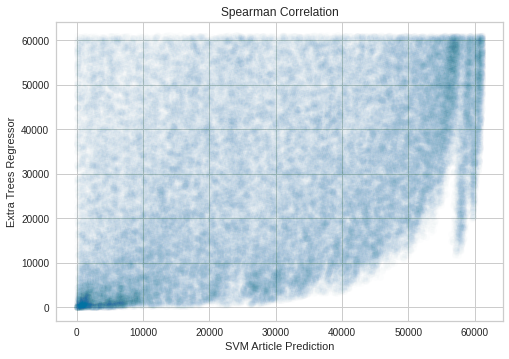

In [ ]:
pd.set_option('display.max_columns', None)
predictions = predict_model(et, data = df2)
print(predictions)

x = predictions.sort_values(by = ["Label"], ascending = False).index

import matplotlib.pyplot as plt
plt.plot(x, "bo", alpha = 0.01)
print(x)
plt.ylabel("Extra Trees Regressor")
plt.xlabel("SVM Article Prediction")
plt.title("Spearman Correlation")
plt.show()

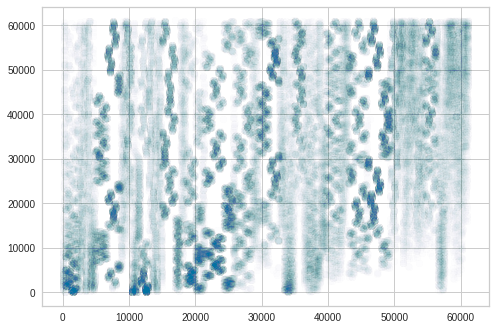

In [ ]:
X = predictions.sort_values(by = ["Label"], ascending = False).index
Y = predictions.sort_values(by = ["PredictedHVmean"], ascending = False).index

plt.scatter(Y, X, alpha = 0.008)
plt.show()

In [ ]:
test = predictions.drop(columns = predictions[["PredictedHVsd"]])
headers = ["Al (at%)", "Co (at%)", "Cr (at%)", "Cu (at%)", "Fe (at%)", "Ni (at%)", "Predicted HV (article)", "Predicted HV (et)"]
test.columns = headers
test


Al (at%)  Co (at%)  Cr (at%)  Cu (at%)  Fe (at%)  Ni (at%)  \
1          43.0      22.0      23.0       0.0       7.0       5.0   
2          43.0      22.0      22.0       0.0       8.0       5.0   
3          43.0      21.0      23.0       0.0       8.0       5.0   
4          43.0      23.0      22.0       0.0       7.0       5.0   
5          43.0      21.0      24.0       0.0       7.0       5.0   
...         ...       ...       ...       ...       ...       ...   
61139      46.0      10.0      12.0      12.0      14.0       6.0   
61140      46.0      17.0       9.0      11.0      10.0       7.0   
61141      47.0      16.0      11.0       9.0       6.0      11.0   
61142      41.0      13.0      12.0      10.0      15.0       9.0   
61143      43.0       9.0      31.0       0.0       6.0      11.0   

       Predicted HV (article)  Predicted HV (et)  
1                  863.301925             766.86  
2                  862.947028             766.62  
3                  862.919674             766.86  
4                  862.411551             766.62  
5                  861.743654             766.50  
...                       ...                ...  
61139              750.003800             754.90  
61140              750.003598             754.31  
61141              750.002858             734.54  
61142              750.001713             743.40  
61143              750.001031             744.52  

[61143 rows x 8 columns]

In [ ]:
#@title
plot_model(et, plot='residuals_interactive')

Gradient Boosting Regressor

In [ ]:
#@title
gbr = create_model("gbr", fold = 10)
evaluate_model(gbr)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0      32.1897   1556.4568   39.4520  0.9604  0.0943  0.0824
1      43.7575   3383.7499   58.1700  0.8917  0.1555  0.1120
2      87.9825  13136.2893  114.6137  0.5104  0.3179  0.2750
3     102.8660  15209.7255  123.3277  0.1942  0.3321  0.2247
4      65.8425   5786.8365   76.0713  0.7070  0.1775  0.1443
5      48.5239   4007.8229   63.3074  0.8492  0.1858  0.1452
6      56.8913   5396.3698   73.4600  0.8223  0.2072  0.1876
7      35.3272   2342.5943   48.4004  0.9435  0.2166  0.1690
8      61.8606   5074.1523   71.2331  0.8689  0.2028  0.1818
9      60.0336   4530.5933   67.3097  0.8475  0.1744  0.1636
Mean   59.5275   6042.4591   73.5345  0.7595  0.2064  0.1686
SD     21.0789   4278.8903   25.2019  0.2253  0.0677  0.0518

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(gbr, plot='residuals_interactive')

Light Gradient Boosting Machine

In [ ]:
#@title
lightgbm = create_model("lightgbm", fold = 10)
evaluate_model(lightgbm)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0      58.7650   6694.4825   81.8198  0.8299  0.2737  0.1946
1      62.8914   5808.0698   76.2107  0.8140  0.1384  0.1252
2      71.2161   7032.7539   83.8615  0.7379  0.2394  0.2229
3     112.9473  17049.8652  130.5751  0.0967  0.3357  0.2498
4      51.0466   4333.3316   65.8280  0.7806  0.1694  0.1229
5      48.7996   4100.5710   64.0357  0.8457  0.1888  0.1359
6      57.0861   6738.1820   82.0864  0.7781  0.2590  0.2145
7      67.2620   5949.7739   77.1348  0.8564  0.3629  0.3516
8      62.7479   5362.4493   73.2287  0.8615  0.1875  0.1588
9      54.2893   4368.9595   66.0981  0.8530  0.2172  0.1754
Mean   64.7051   6743.8439   80.0879  0.7454  0.2372  0.1951
SD     17.3917   3579.8327   18.1596  0.2196  0.0685  0.0663

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(lightgbm, plot='residuals_interactive')

Linear Regression

In [ ]:
#@title
lr = create_model("lr", fold = 10)
evaluate_model(lr)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0     56.5105   4717.6729   68.6853  0.8801  0.1662  0.1472
1     67.6350   8169.9404   90.3877  0.7384  0.1537  0.1262
2     67.6285   9458.1543   97.2530  0.6475  0.2480  0.1998
3     94.9956  12555.7852  112.0526  0.3348  0.2452  0.1971
4     62.3567   6139.3223   78.3538  0.6892  0.1700  0.1378
5     70.3197   7754.8892   88.0619  0.7082  0.2511  0.2217
6     63.4751   7056.1748   84.0010  0.7676  0.2411  0.2175
7     99.0661  13623.0752  116.7179  0.6713  0.4817  0.5041
8     70.7633   6485.3228   80.5315  0.8325  0.2037  0.1895
9     53.9658   4270.5864   65.3497  0.8563  0.1911  0.1583
Mean  70.6716   8023.0923   88.1395  0.7126  0.2352  0.2099
SD    14.2023   2931.0982   15.9540  0.1470  0.0894  0.1031

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(lr, plot = "residuals_interactive")

Least Angle Regression

In [ ]:
#@title
lar = create_model("lar", fold = 10)
evaluate_model(lar)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0     56.5120   4718.2497   68.6895  0.8801  0.1662  0.1472
1     67.6400   8170.0947   90.3886  0.7384  0.1537  0.1262
2     67.6403   9455.9374   97.2416  0.6476  0.2480  0.1998
3     94.9773  12543.4255  111.9974  0.3355  0.2451  0.1971
4     62.3817   6145.8935   78.3957  0.6888  0.1700  0.1378
5     70.3040   7759.4030   88.0875  0.7080  0.2513  0.2217
6     63.7138   7099.8438   84.2606  0.7662  0.2420  0.2184
7     98.9946  13612.0408  116.6707  0.6715  0.4814  0.5036
8     70.7682   6485.8566   80.5348  0.8324  0.2037  0.1896
9     53.8479   4259.4459   65.2644  0.8567  0.1912  0.1582
Mean  70.6780   8025.0191   88.1531  0.7125  0.2353  0.2100
SD    14.1850   2926.4361   15.9390  0.1468  0.0893  0.1029

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(lar, plot = "residuals_interactive")

Ridge Regression

In [ ]:
#@title
ridge = create_model("ridge", fold = 10)
evaluate_model(ridge)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0      57.1011   5082.7061   71.2931  0.8708  0.1827  0.1551
1      66.5345   8252.6328   90.8440  0.7358  0.1525  0.1275
2      69.7632   9158.9619   95.7025  0.6587  0.2441  0.2029
3      92.9838  11340.7148  106.4928  0.3992  0.2350  0.1963
4      65.2666   6914.8281   83.1554  0.6499  0.1732  0.1394
5      71.7080   7573.8940   87.0281  0.7150  0.2427  0.2193
6      53.3860   5108.8149   71.4760  0.8318  0.1916  0.1744
7     104.6348  14557.5820  120.6548  0.6487  0.5034  0.5410
8      74.0023   6955.8999   83.4020  0.8203  0.2088  0.1953
9      59.3969   4949.2212   70.3507  0.8335  0.1907  0.1630
Mean   71.4777   7989.5256   88.0399  0.7164  0.2325  0.2114
SD     15.2126   2901.6253   15.4432  0.1323  0.0949  0.1133

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(ridge, plot = "residuals_interactive")

**AdaBoost Regressor**

In [ ]:
#@title
ada = create_model("ada", fold = 10)
evaluate_model(ada)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0     39.0551   2230.2569   47.2256  0.9433  0.1702  0.1332
1     62.4682   6013.6149   77.5475  0.8075  0.1462  0.1284
2     88.8588  11863.8516  108.9213  0.5579  0.3112  0.2743
3     88.2552  14986.2652  122.4184  0.2061  0.3621  0.2001
4     72.8648   6612.5853   81.3178  0.6652  0.1992  0.1803
5     53.1036   4872.8443   69.8058  0.8166  0.1641  0.1348
6     49.1861   6464.3481   80.4012  0.7871  0.2094  0.1582
7     65.8445   5821.4412   76.2984  0.8595  0.3372  0.3159
8     63.2107   6627.8446   81.4116  0.8288  0.1978  0.1562
9     54.2944   3649.9159   60.4145  0.8772  0.1445  0.1385
Mean  63.7142   6914.2968   80.5762  0.7349  0.2242  0.1820
SD    15.3135   3588.8690   20.5371  0.2046  0.0774  0.0611

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(ada, plot = "residuals_interactive")

Lasso Regression

In [ ]:
#@title
lasso = create_model("lasso", fold = 10)
evaluate_model(lasso)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0      57.2303   5142.0034   71.7078  0.8693  0.1852  0.1565
1      66.3858   8250.5586   90.8326  0.7358  0.1526  0.1280
2      69.9230   9105.2334   95.4213  0.6607  0.2435  0.2029
3      92.6878  11195.6924  105.8097  0.4069  0.2340  0.1963
4      65.7186   7014.1689   83.7506  0.6449  0.1740  0.1400
5      71.9627   7579.0098   87.0575  0.7148  0.2421  0.2194
6      52.3736   4907.1333   70.0509  0.8384  0.1856  0.1695
7     105.1844  14648.9600  121.0329  0.6465  0.5055  0.5448
8      74.4145   7039.3608   83.9009  0.8181  0.2097  0.1960
9      60.0122   5048.5449   71.0531  0.8301  0.1911  0.1636
Mean   71.5893   7993.0666   88.0617  0.7166  0.2323  0.2117
SD     15.3482   2902.1016   15.4336  0.1307  0.0955  0.1144

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(lasso, plot = "residuals_interactive")

Elastic Net

In [ ]:
#@title
en = create_model("en", fold = 10)
evaluate_model(en)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0      57.0085   5092.4043   71.3611  0.8706  0.1846  0.1565
1      65.8027   8122.0845   90.1226  0.7400  0.1520  0.1273
2      69.6395   9032.0283   95.0370  0.6634  0.2431  0.2023
3      92.7644  11198.6504  105.8237  0.4067  0.2342  0.1968
4      65.9279   7055.9185   83.9995  0.6428  0.1748  0.1407
5      72.1997   7625.2656   87.3228  0.7131  0.2429  0.2202
6      52.3090   4875.6138   69.8256  0.8394  0.1866  0.1699
7     105.7281  14749.8369  121.4489  0.6441  0.5077  0.5485
8      75.0591   7130.5010   84.4423  0.8158  0.2114  0.1981
9      60.1404   5067.8843   71.1891  0.8295  0.1924  0.1646
Mean   71.6579   7995.0188   88.0572  0.7165  0.2330  0.2125
SD     15.5273   2923.5655   15.5222  0.1310  0.0960  0.1154

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(en, plot = "residuals_interactive")

Lasso Least Angle Regression

In [ ]:
#@title
llar = create_model("llar", fold = 10)
evaluate_model(llar)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0      59.1504   5250.9936   72.4637  0.8666  0.2171  0.1824
1      55.6418   5447.0020   73.8038  0.8256  0.1412  0.1181
2      61.6898   6476.8639   80.4790  0.7586  0.2205  0.1858
3      90.1002  11188.4881  105.7756  0.4073  0.2373  0.1959
4      73.4822   7645.1332   87.4365  0.6129  0.2011  0.1716
5      81.6260   8799.5743   93.8060  0.6689  0.2703  0.2544
6      49.4299   4222.0445   64.9773  0.8610  0.1914  0.1736
7     109.4391  15084.6641  122.8196  0.6360  0.5225  0.5780
8      85.8855   9584.3573   97.8997  0.7524  0.2506  0.2340
9      63.5622   5565.9874   74.6055  0.8127  0.2209  0.1885
Mean   73.0007   7926.5108   87.4067  0.7202  0.2473  0.2282
SD     17.6821   3165.0039   16.9287  0.1351  0.0976  0.1216

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(llar, plot = "residuals_interactive")

Huber Regressor

In [ ]:
#@title
huber = create_model("huber", fold = 10)
evaluate_model(huber)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0      56.7188   5369.8262   73.2791  0.8635  0.2064  0.1487
1      70.1138  10360.4349  101.7862  0.6683  0.1682  0.1319
2      80.1453  12779.4186  113.0461  0.5237  0.2725  0.2305
3      95.1298  12508.8615  111.8430  0.3373  0.2433  0.1917
4      67.1091   7112.7980   84.3374  0.6399  0.1811  0.1470
5      66.4931   6317.9735   79.4857  0.7623  0.2256  0.2041
6      52.0821   4573.8189   67.6300  0.8494  0.1812  0.1672
7     102.9740  14690.2189  121.2032  0.6455  0.4983  0.5270
8      69.6466   6964.1857   83.4517  0.8201  0.1858  0.1634
9      58.2427   4948.5063   70.3456  0.8335  0.1796  0.1492
Mean   71.8655   8562.6043   90.6408  0.6943  0.2342  0.2061
SD     15.6313   3507.0717   18.6239  0.1597  0.0935  0.1107

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(huber, plot = "residuals_interactive")

Orthogonal Matching Pursuit

In [ ]:
#@title
omp = create_model("omp", fold = 10)
evaluate_model(omp)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0      70.1220   8667.2125   93.0979  0.7798  0.2742  0.2256
1      54.3652   4556.0145   67.4983  0.8541  0.1747  0.1487
2      68.2397   6147.9512   78.4089  0.7709  0.2252  0.2000
3     103.5365  17840.1111  133.5669  0.0549  0.3224  0.2215
4      96.4950  11959.6091  109.3600  0.3945  0.2915  0.2602
5      87.5515   9828.7110   99.1399  0.6301  0.2844  0.2742
6      42.8049   3724.4499   61.0283  0.8773  0.1427  0.1252
7     100.9980  12642.6568  112.4396  0.6949  0.4788  0.5091
8     105.5140  18147.6805  134.7133  0.5312  0.3050  0.2463
9      63.2613   6581.8856   81.1288  0.7785  0.1811  0.1480
Mean   79.2888  10009.6282   97.0382  0.6366  0.2680  0.2359
SD     21.2758   4858.2072   24.3561  0.2399  0.0914  0.1030

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(omp, plot = "residuals_interactive")

Passive Aggressive Regressor

In [ ]:
#@title
par = create_model("par", fold = 10)
evaluate_model(par)

MAE         MSE      RMSE      R2   RMSLE    MAPE
0      63.7152   5865.4279   76.5861  0.8510  0.7656  0.2347
1      61.8599   8291.8112   91.0594  0.7345  0.1734  0.1199
2      61.7196   6424.8707   80.1553  0.7606  0.1850  0.1477
3     137.4646  26187.3950  161.8252 -0.3873  0.3865  0.2717
4     115.8715  23441.0644  153.1047 -0.1868  0.3530  0.2403
5      77.0544  13274.8312  115.2165  0.5005  0.2620  0.1538
6      33.6144   1611.3677   40.1418  0.9469  0.1466  0.1157
7     116.1144  18575.6382  136.2925  0.5518  0.4378  0.4148
8     102.9508  14562.0397  120.6733  0.6238  0.2930  0.2563
9      81.5261   7944.8428   89.1338  0.7327  0.2763  0.2610
Mean   85.1891  12617.9289  106.4189  0.5128  0.3279  0.2216
SD     30.4002   7659.1365   35.9577  0.4213  0.1712  0.0864

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#@title
plot_model(par, plot = "residuals_interactive")